In [3]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt

import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc
from SplineEncodingModel.LinearRegressionSpline import EncodingModel

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [4]:
mouse = '4139265.3'
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

df_mouse = df[df['MouseName'].str.match(mouse)]
# df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse

G:\My Drive\VR_Data\TwoTower\behavior.sqlite


MouseName  DateFolder  SessionNumber              Track  RewardCount  \
1403  4139265.3  10_02_2019              1  TwoTower_foraging           60   
1405  4139265.3  10_02_2019              3  TwoTower_foraging           60   
1433  4139265.3  12_02_2019              2  TwoTower_foraging           90   
1455  4139265.3  15_02_2019              4  TwoTower_foraging           72   
1475  4139265.3  17_02_2019              2  TwoTower_foraging           81   
1495  4139265.3  19_02_2019              2  TwoTower_foraging           92   
1513  4139265.3  21_02_2019              2  TwoTower_foraging           90   
1522  4139265.3  22_02_2019              2  TwoTower_foraging           90   
1531  4139265.3  23_02_2019              2  TwoTower_foraging           93   
1537  4139265.3  24_02_2019              2  TwoTower_foraging           97   

      Imaging ImagingRegion   DateTime  \
1403        1           CA1 2019-02-10   
1405        1           CA1 2019-02-10   
1433        1           CA1 2019-02-12   
1455        1           CA1 2019-02-15   
1475        1           CA1 2019-02-17   
1495        1           CA1 2019-02-19   
1513        1           CA1 2019-02-21   
1522        1           CA1 2019-02-22   
1531        1           CA1 2019-02-23   
1537        1           CA1 2019-02-24   

                                              data file scanfile  \
1403  G:\My Drive\VR_Data\TwoTower\4139265.3\10_02_2...     None   
1405  G:\My Drive\VR_Data\TwoTower\4139265.3\10_02_2...     None   
1433  G:\My Drive\VR_Data\TwoTower\4139265.3\12_02_2...     None   
1455  G:\My Drive\VR_Data\TwoTower\4139265.3\15_02_2...     None   
1475  G:\My Drive\VR_Data\TwoTower\4139265.3\17_02_2...     None   
1495  G:\My Drive\VR_Data\TwoTower\4139265.3\19_02_2...     None   
1513  G:\My Drive\VR_Data\TwoTower\4139265.3\21_02_2...     None   
1522  G:\My Drive\VR_Data\TwoTower\4139265.3\22_02_2...     None   
1531  G:\My Drive\VR_Data\TwoTower\4139265.3\23_02_2...     None   
1537  G:\My Drive\VR_Data\TwoTower\4139265.3\24_02_2...     None   

                                                scanmat  \
1403  G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...   
1405  G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...   
1433  G:\My Drive\2P_Data\TwoTower\4139265.3\12_02_2...   
1455  G:\My Drive\2P_Data\TwoTower\4139265.3\15_02_2...   
1475  G:\My Drive\2P_Data\TwoTower\4139265.3\17_02_2...   
1495  G:\My Drive\2P_Data\TwoTower\4139265.3\19_02_2...   
1513  G:\My Drive\2P_Data\TwoTower\4139265.3\21_02_2...   
1522  G:\My Drive\2P_Data\TwoTower\4139265.3\22_02_2...   
1531  G:\My Drive\2P_Data\TwoTower\4139265.3\23_02_2...   
1537  G:\My Drive\2P_Data\TwoTower\4139265.3\24_02_2...   

                                              s2pfolder  
1403  G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...  
1405  G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...  
1433  G:\My Drive\2P_Data\TwoTower\4139265.3\12_02_2...  
1455  G:\My Drive\2P_Data\TwoTower\4139265.3\15_02_2...  
1475  G:\My Drive\2P_Data\TwoTower\4139265.3\17_02_2...  
1495  G:\My Drive\2P_Data\TwoTower\4139265.3\19_02_2...  
1513  G:\My Drive\2P_Data\TwoTower\4139265.3\21_02_2...  
1522  G:\My Drive\2P_Data\TwoTower\4139265.3\22_02_2...  
1531  G:\My Drive\2P_Data\TwoTower\4139265.3\23_02_2...  
1537  G:\My Drive\2P_Data\TwoTower\4139265.3\24_02_2...

In [5]:
sess = df_mouse.iloc[-1]

In [6]:
VRDat,C, S, A = pp.load_scan_sess(sess)

num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


In [69]:
C/=C.mean(axis=0).reshape(1,-1)
Ssm = sp.ndimage.filters.gaussian_filter1d(S,5,axis=0)

In [16]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)

In [26]:
posmask = (VRDat.pos>0) & (VRDat.pos<450)
effMorph =VRDat.morph._values+VRDat.bckgndJitter._values + VRDat.wallJitter._values
effMorph = (effMorph-np.amin(effMorph))/(np.amax(effMorph)-np.amin(effMorph)+.01)+.001
print(effMorph)


[0.001      0.001      0.001      ... 0.73474688 0.73474688 0.73474688]


In [63]:
splmdl = EncodingModel()
X = splmdl.make_design_matrix(VRDat.pos._values[posmask],effMorph[posmask])

In [64]:
print(X.shape)

(25338, 85)


In [70]:
splmdl.fit_linear(X,Ssm[posmask,:])

In [71]:
Y= splmdl.predict_linear(X)

(1634, 85) (25338, 85)


In [72]:
print(Y.shape)

(25338, 1634)


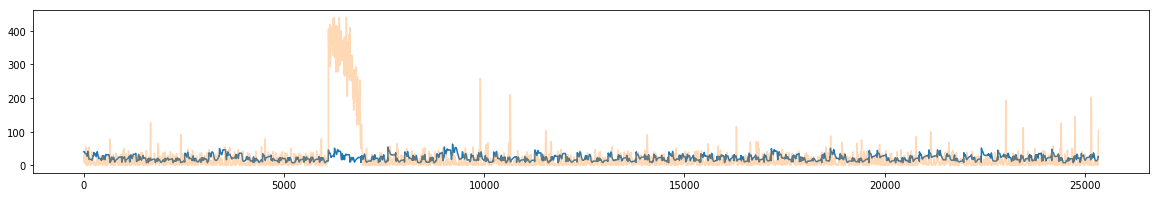

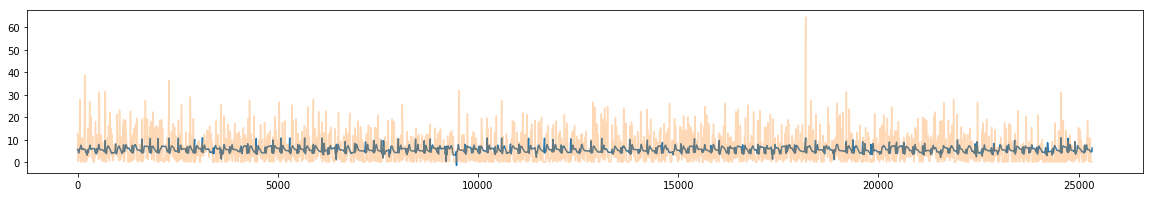

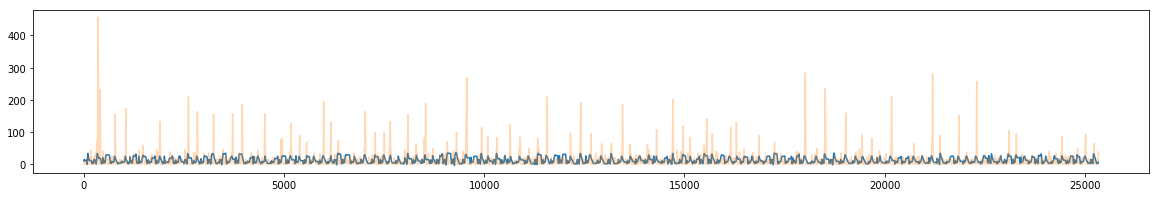

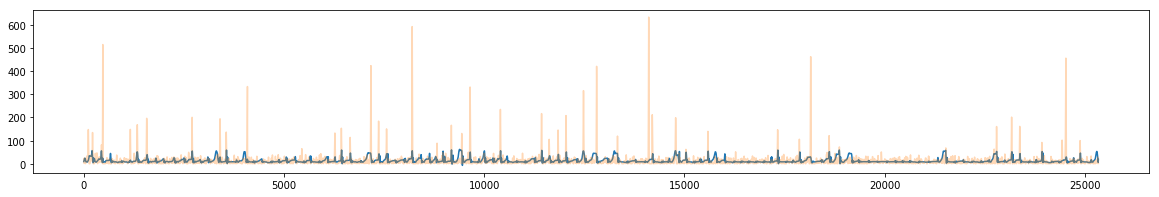

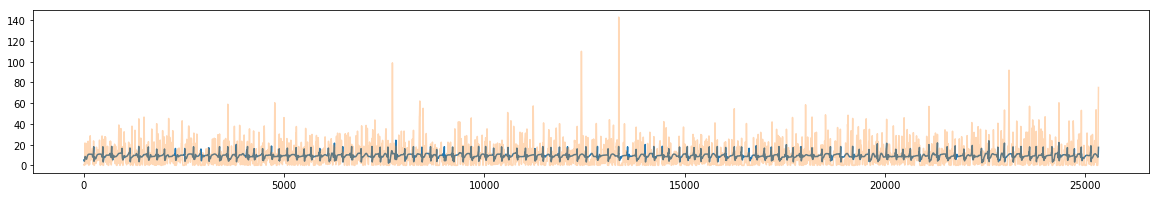

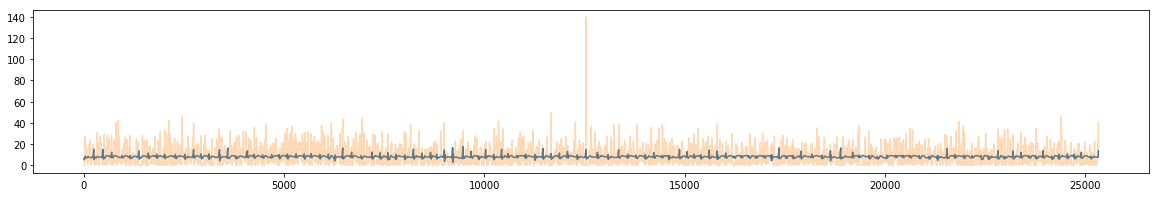

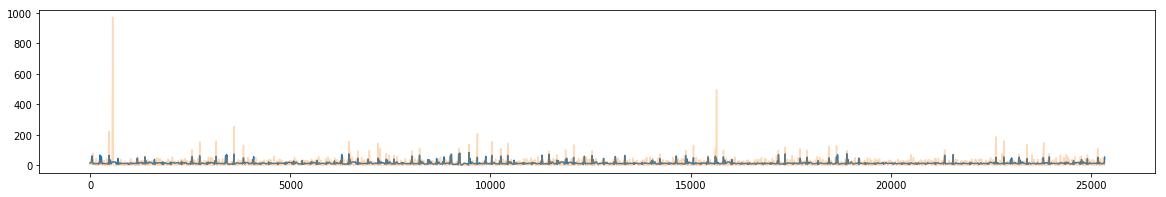

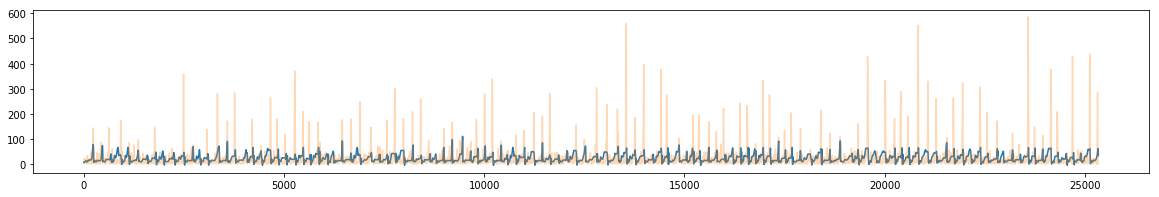

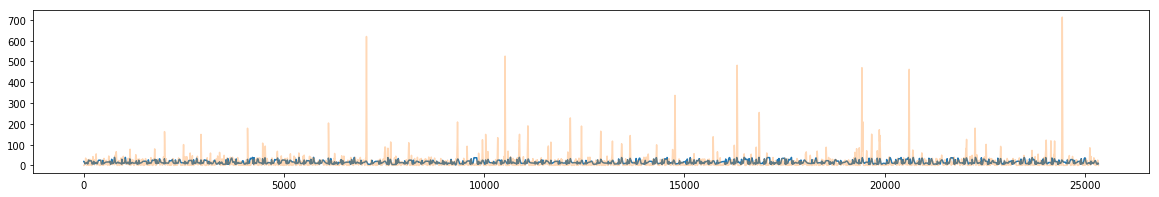

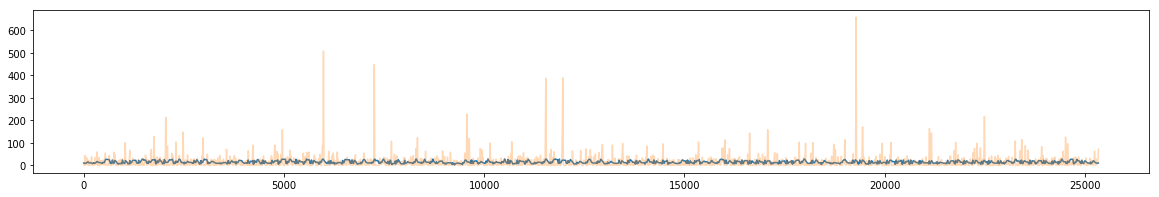

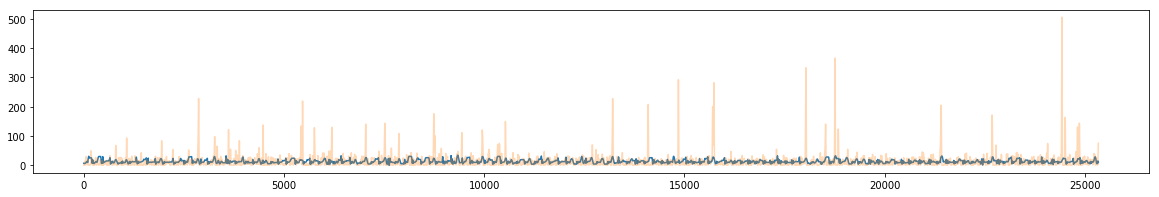

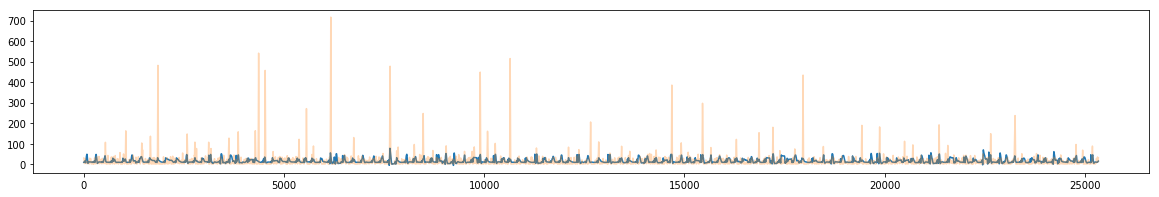

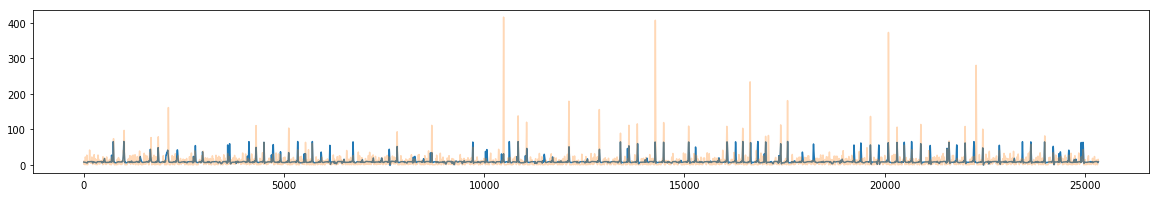

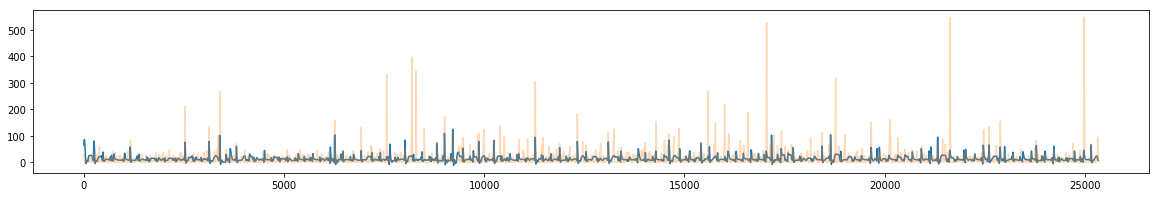

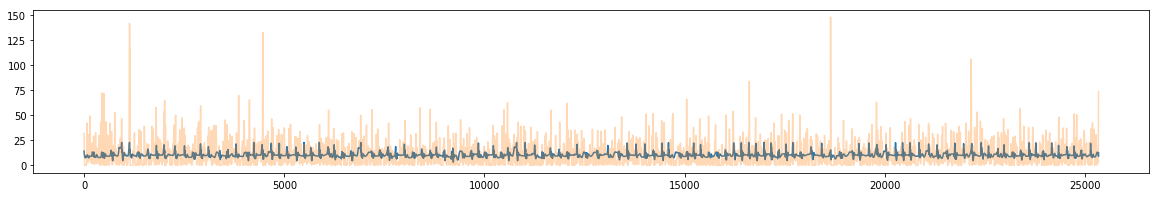

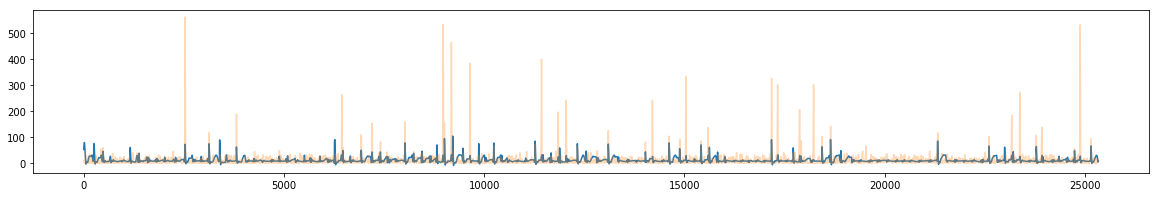

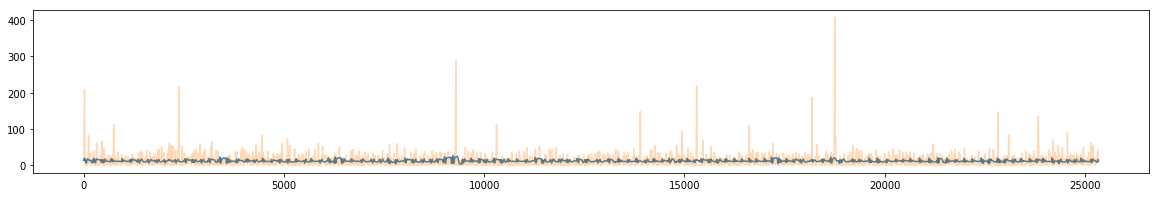

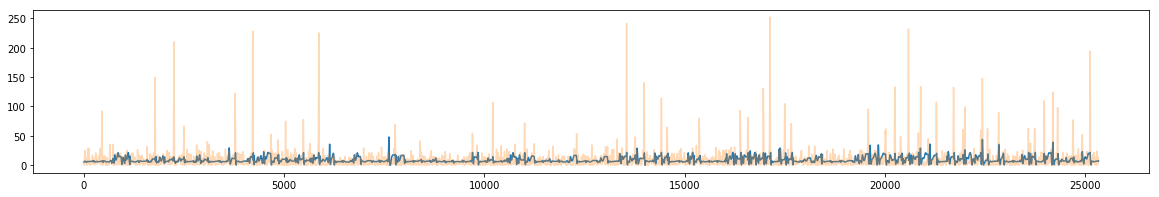

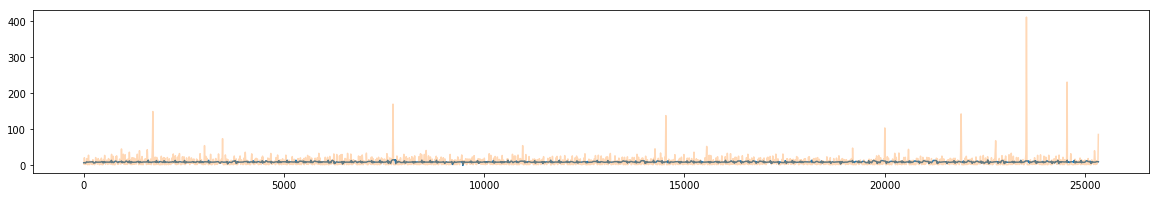

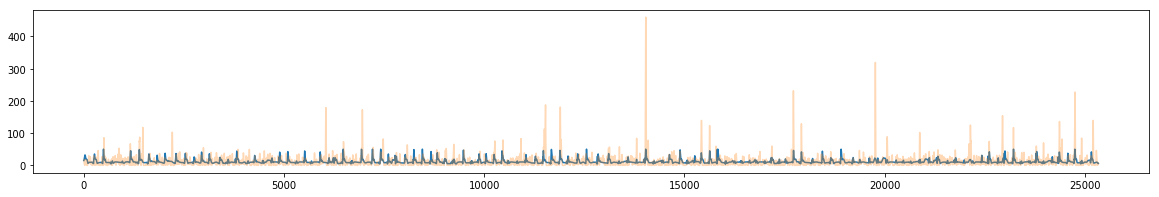

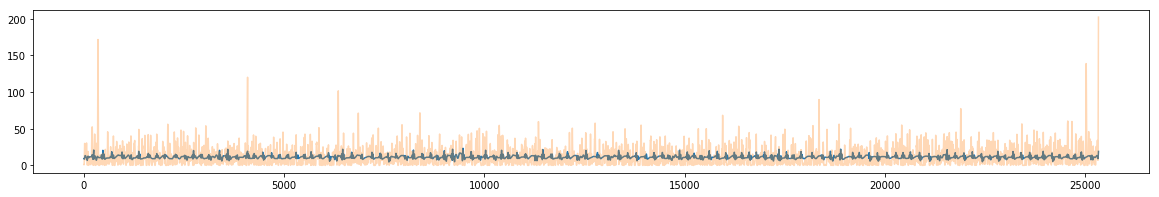

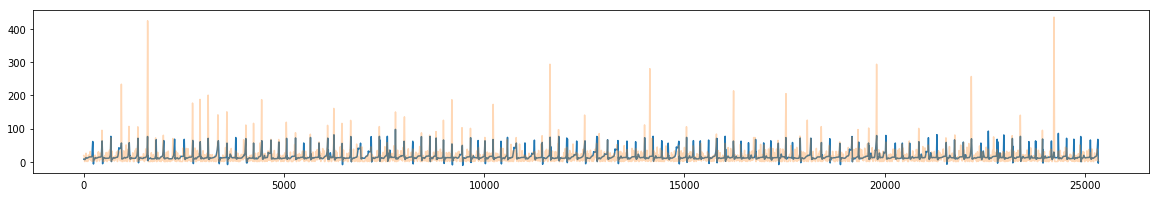

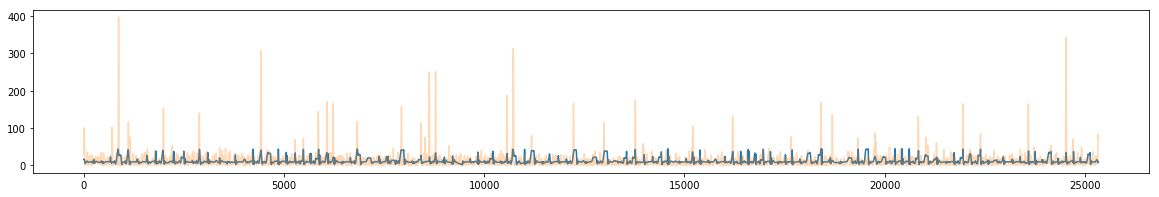

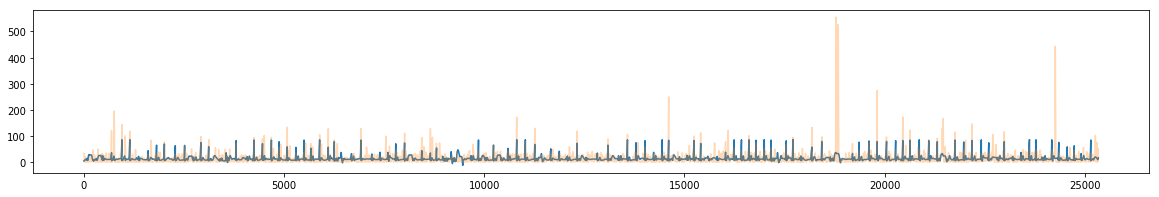

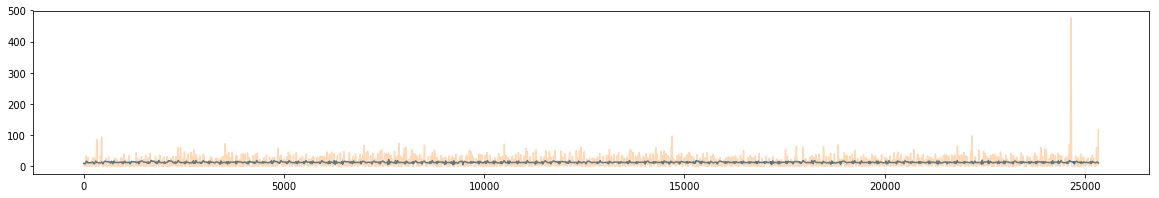

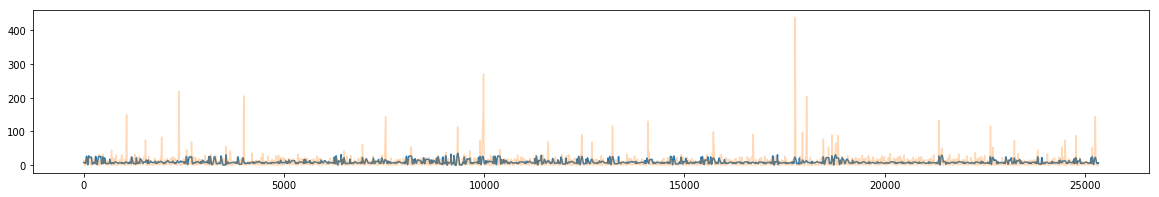

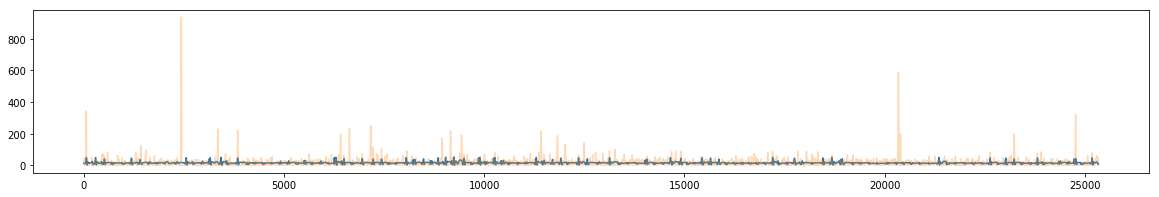

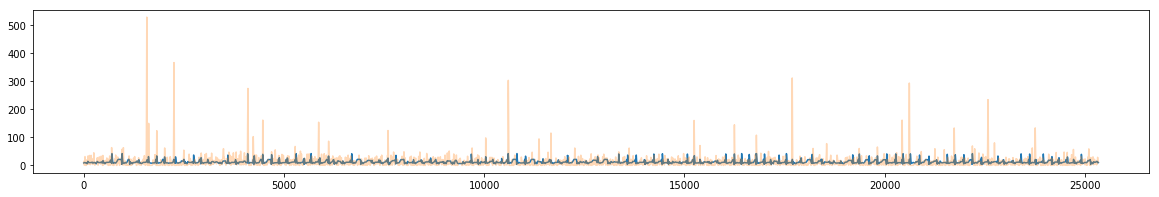

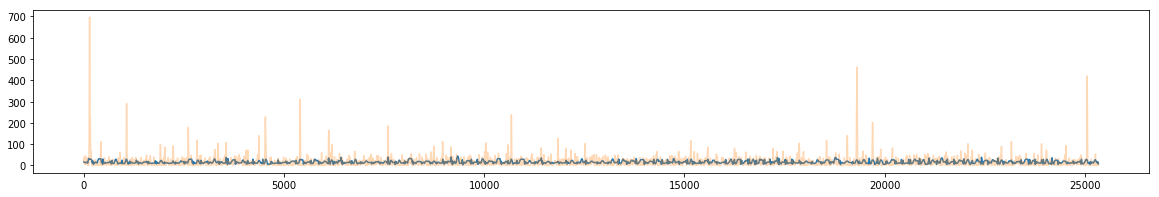

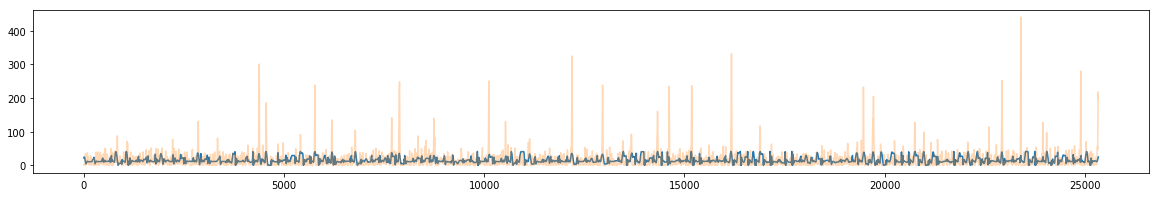

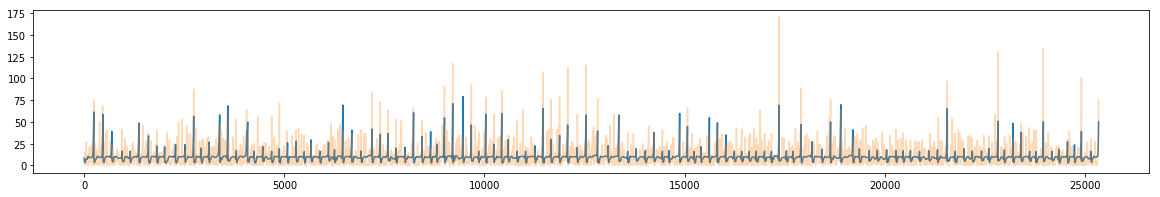

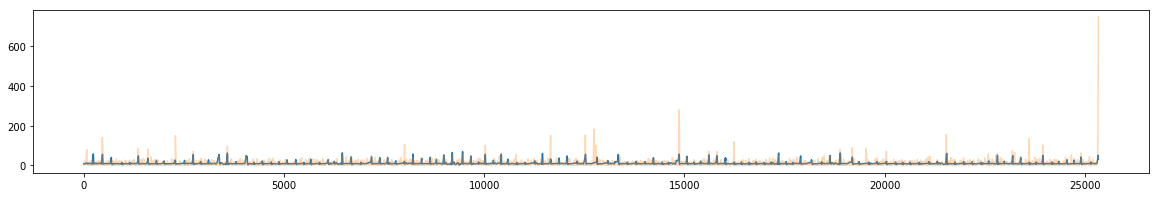

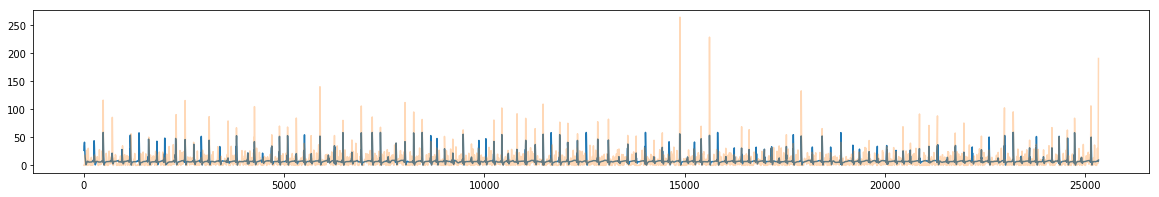

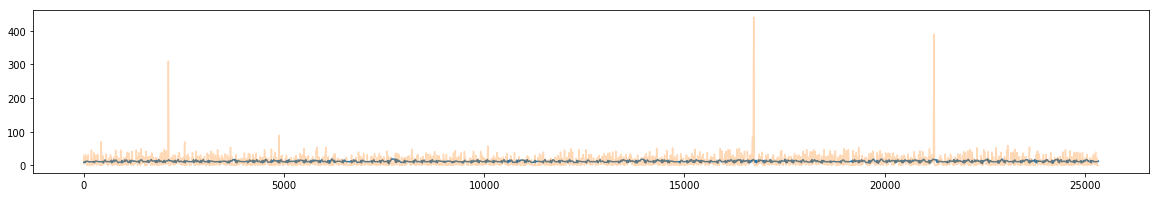

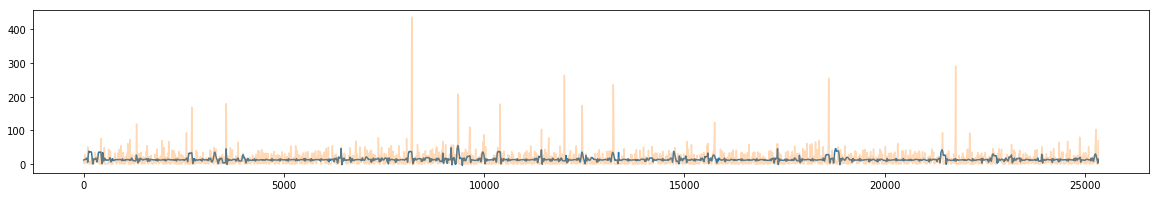

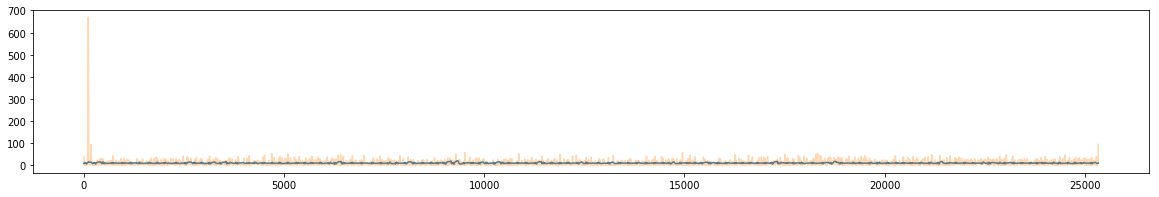

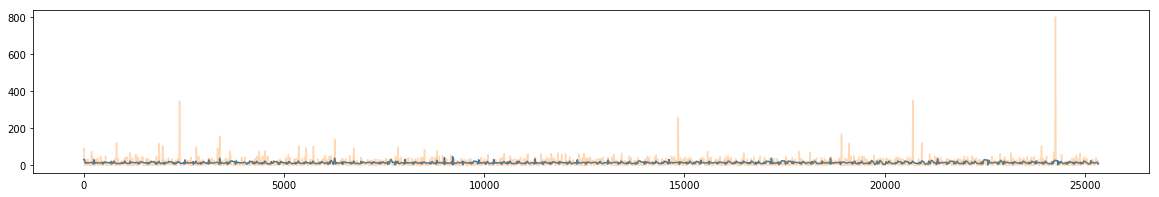

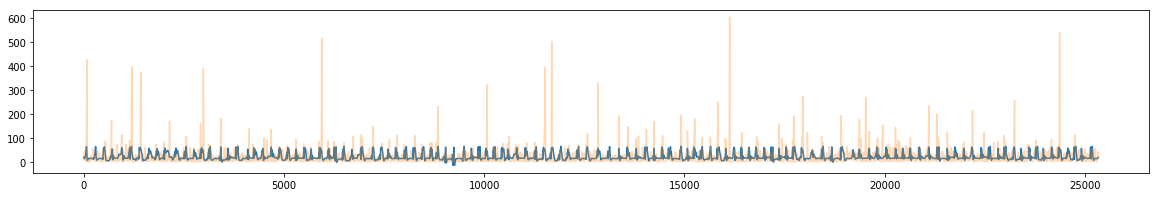

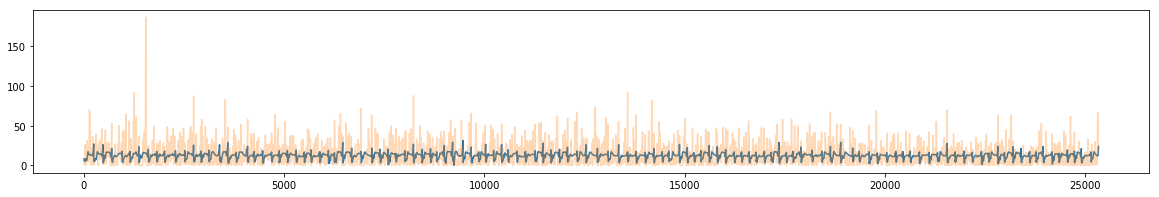

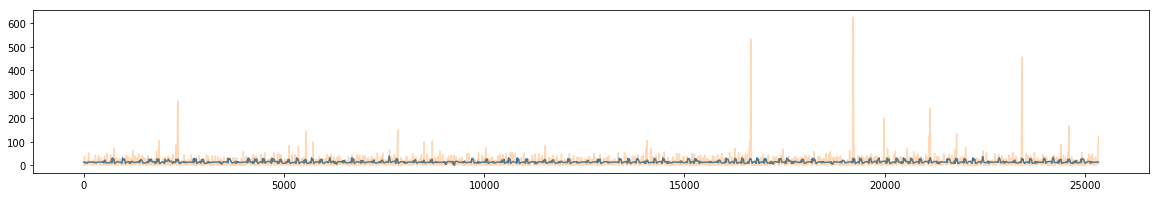

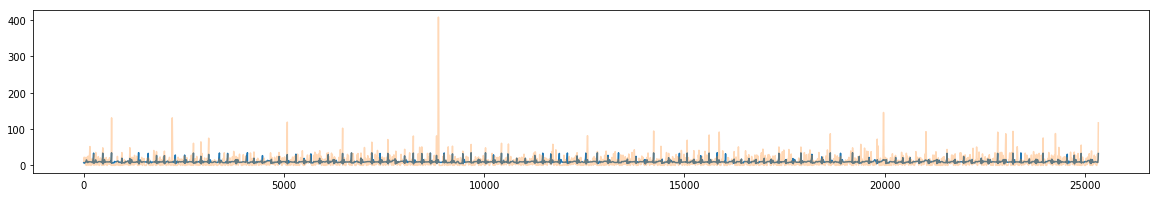

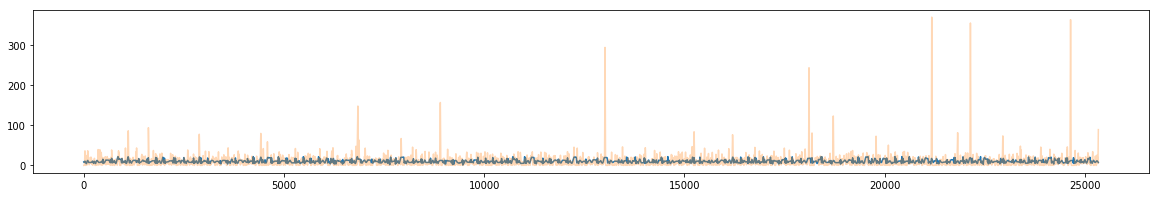

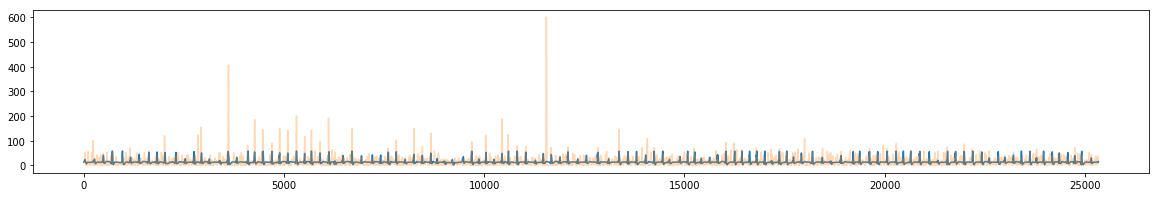

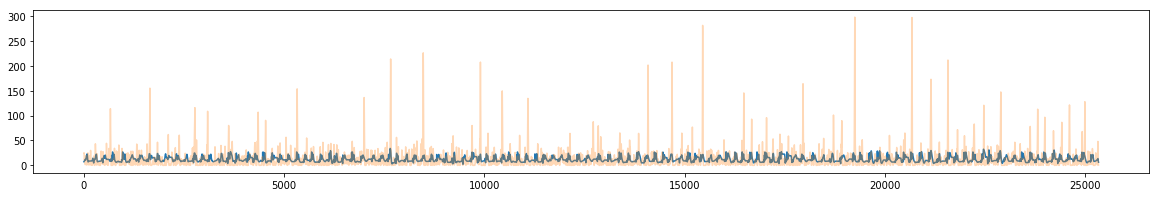

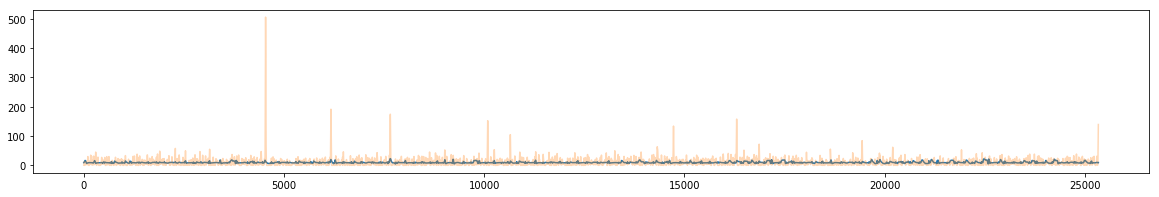

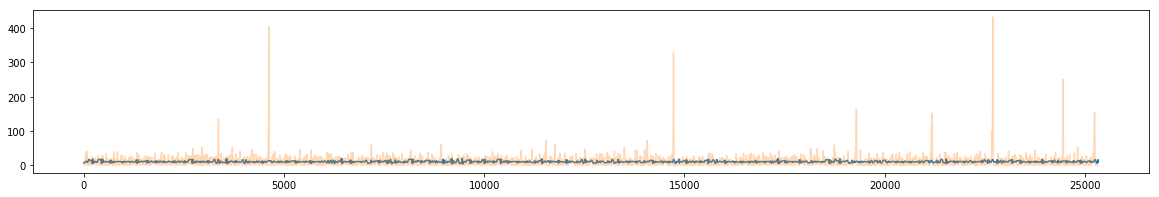

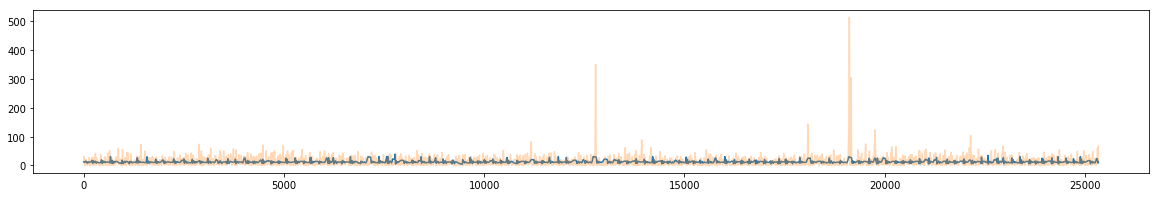

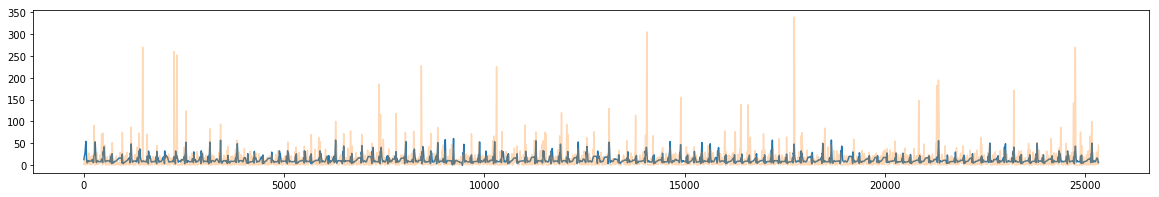

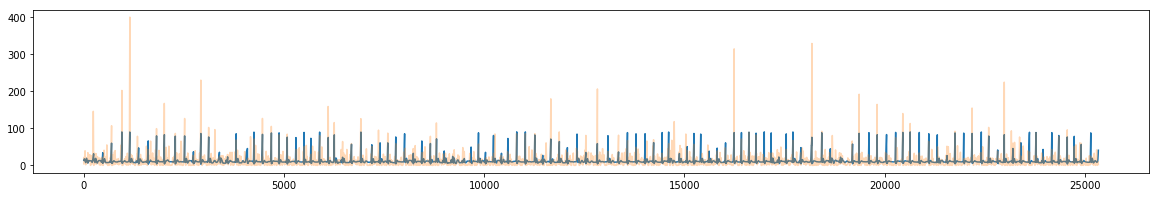

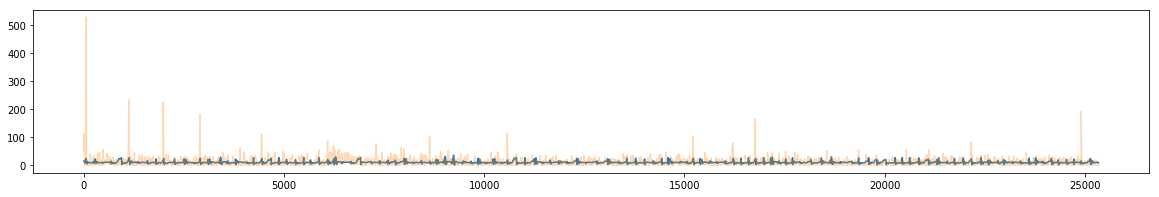

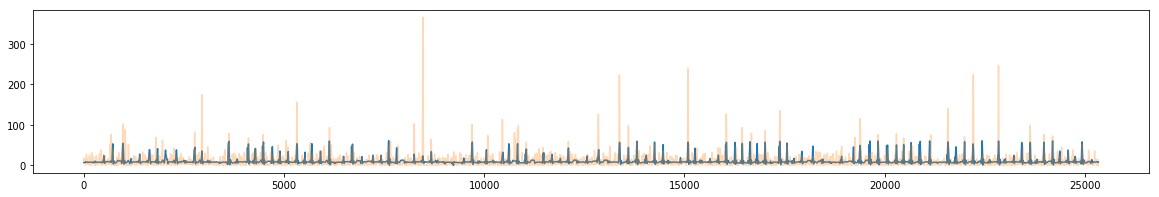

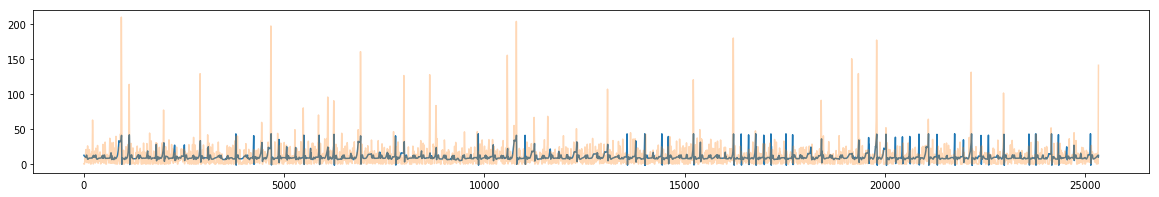

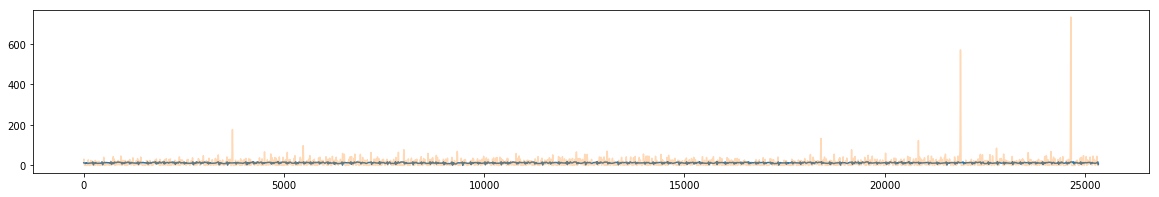

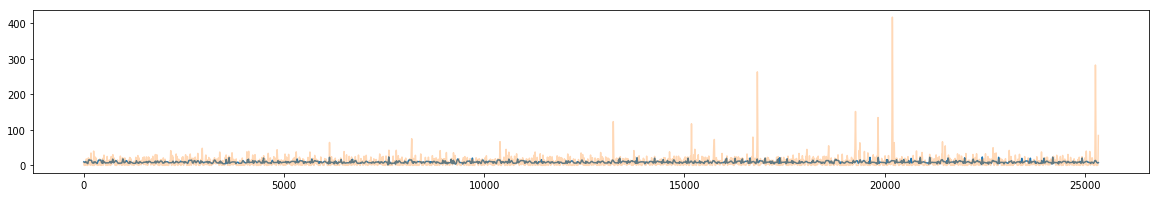

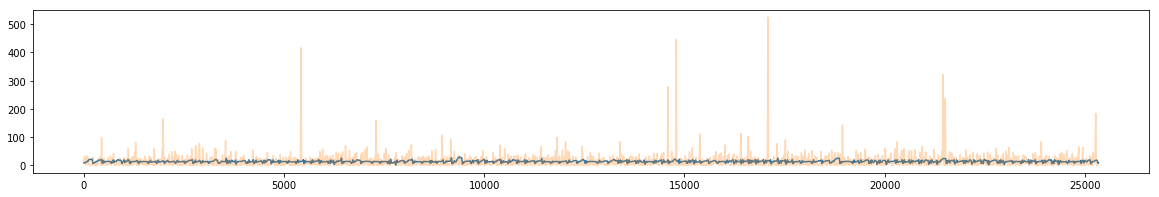

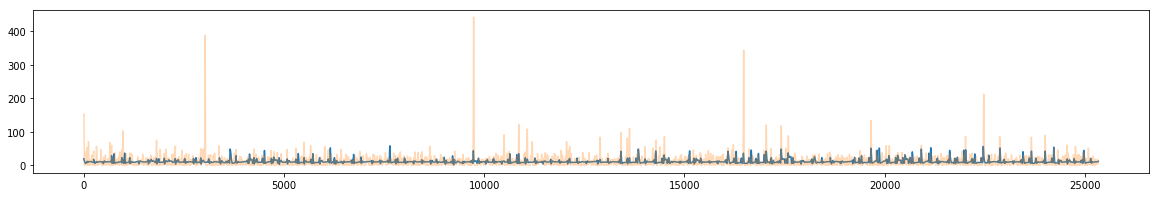

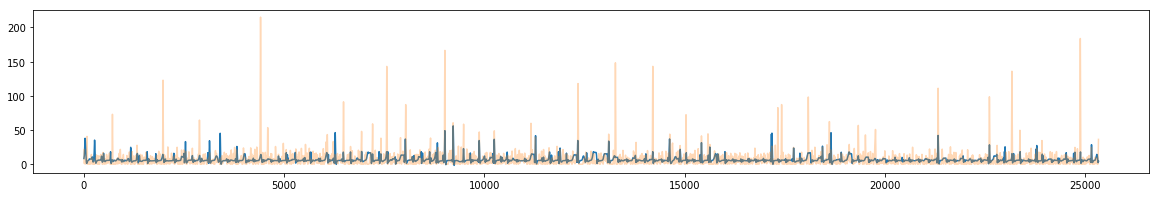

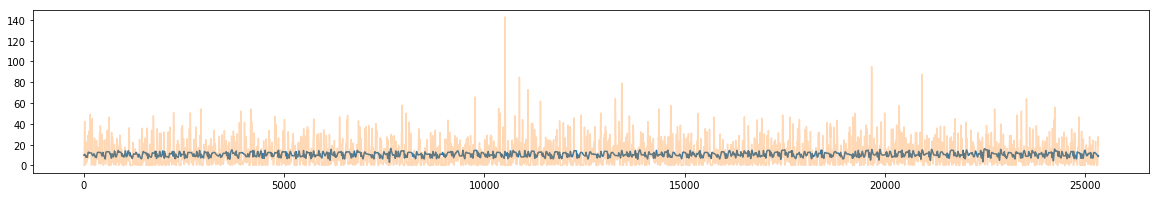

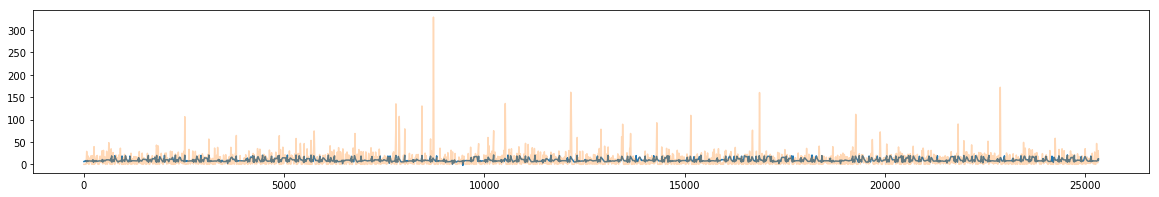

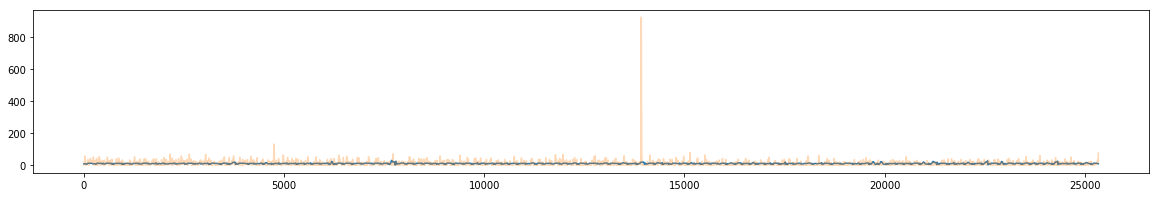

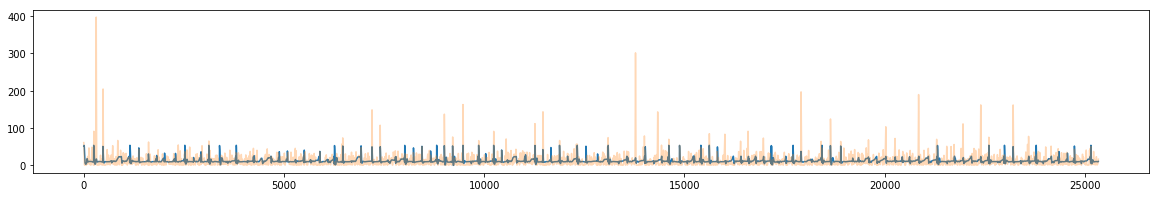

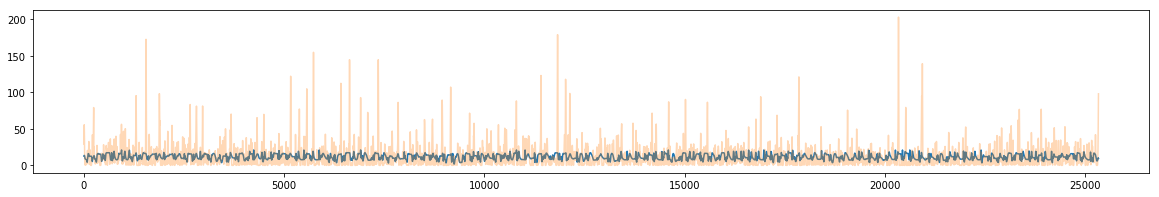

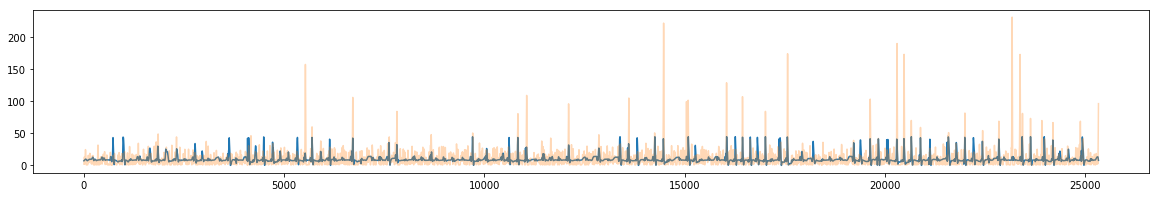

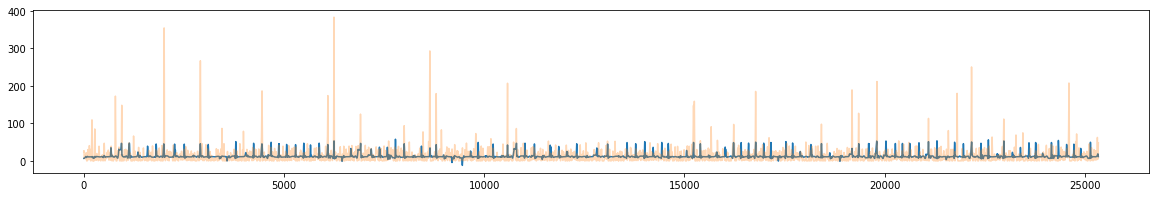

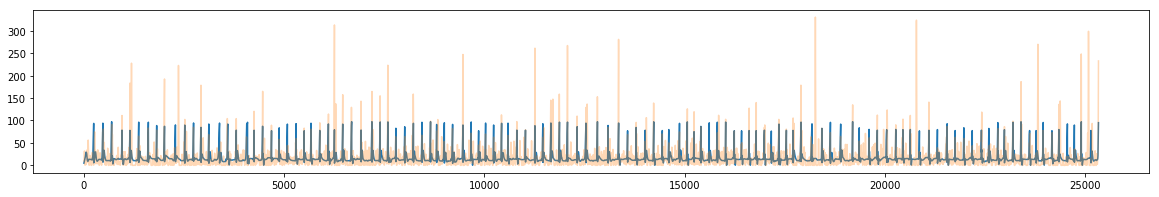

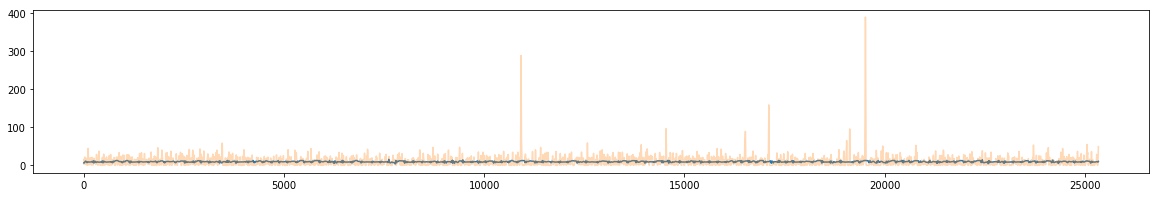

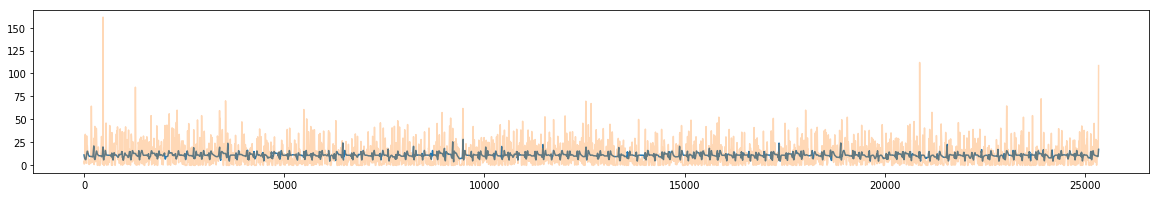

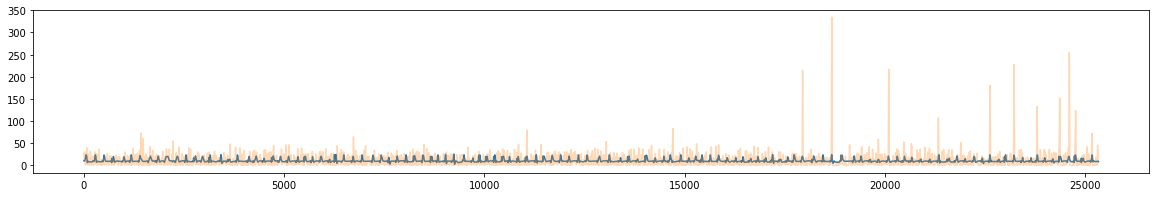

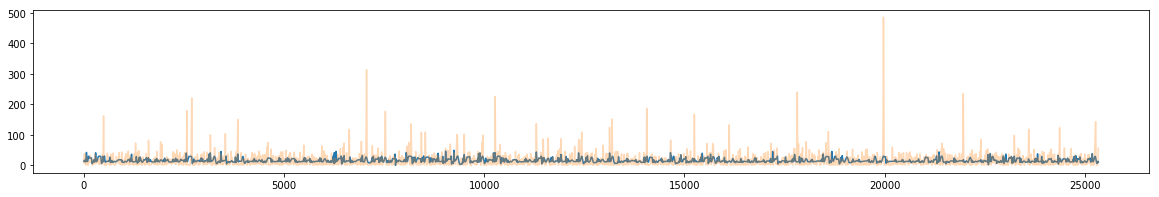

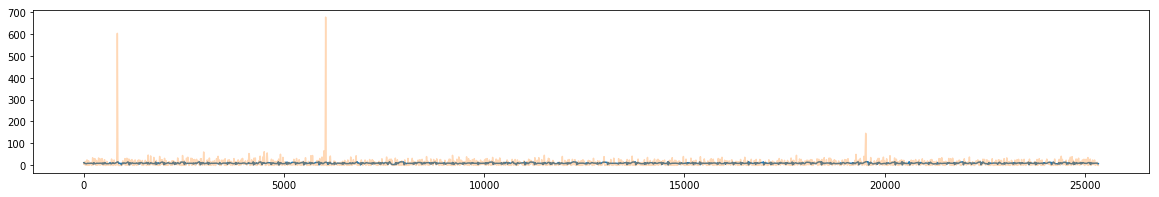

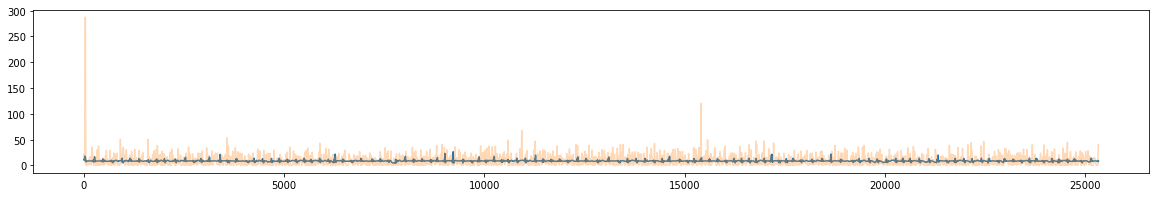

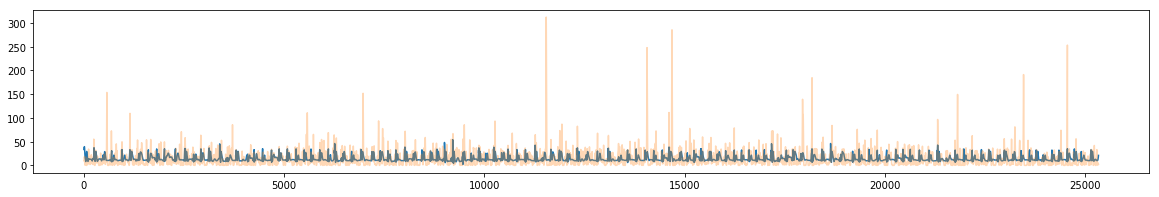

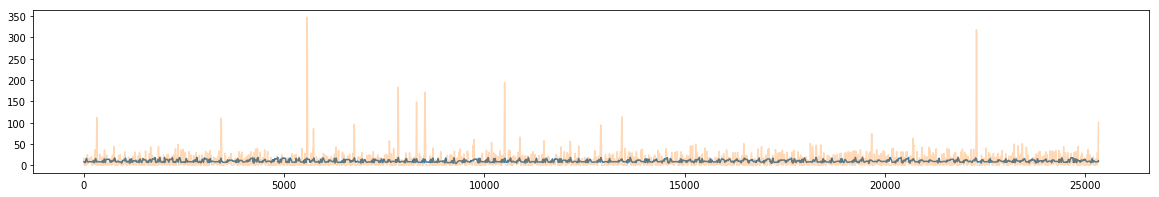

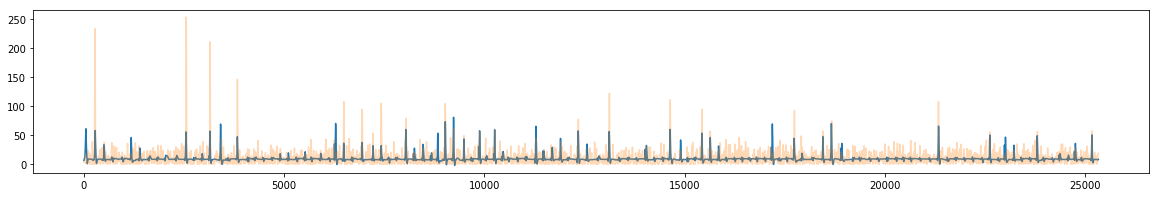

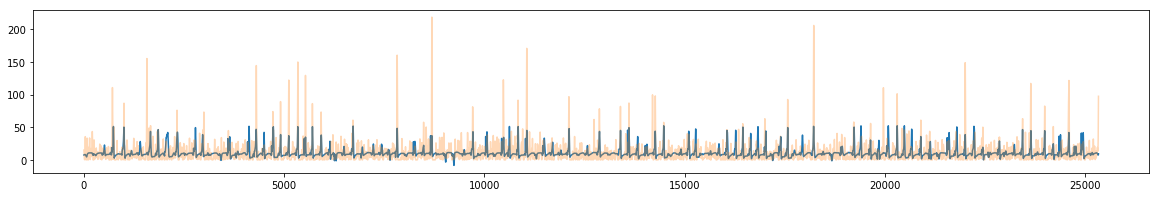

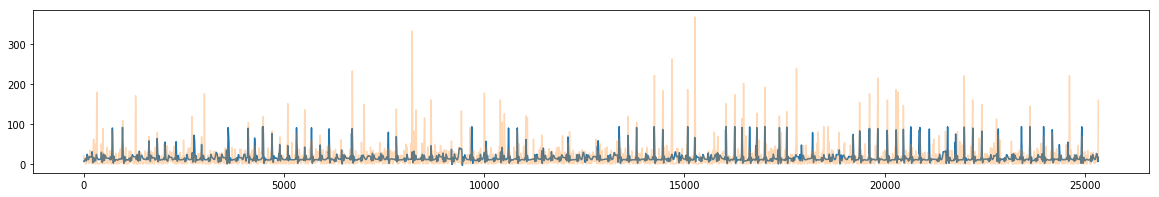

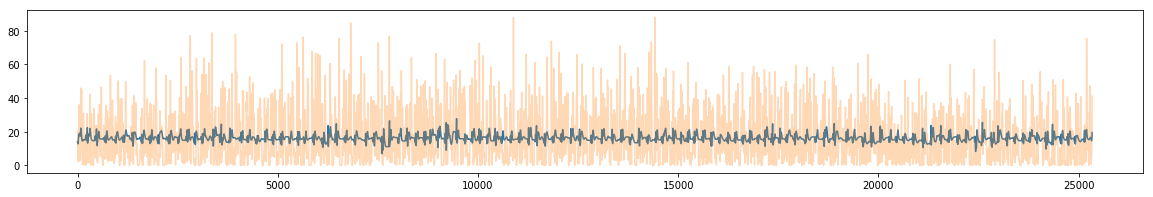

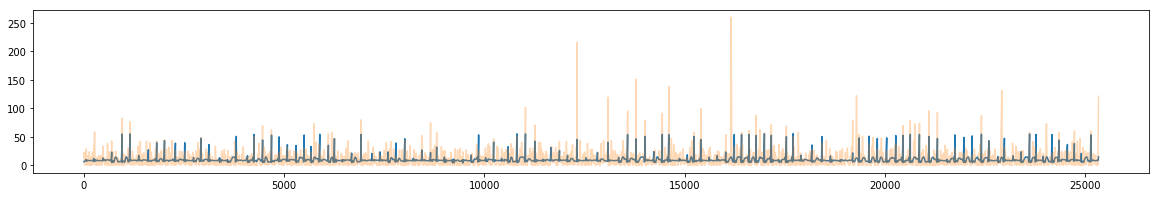

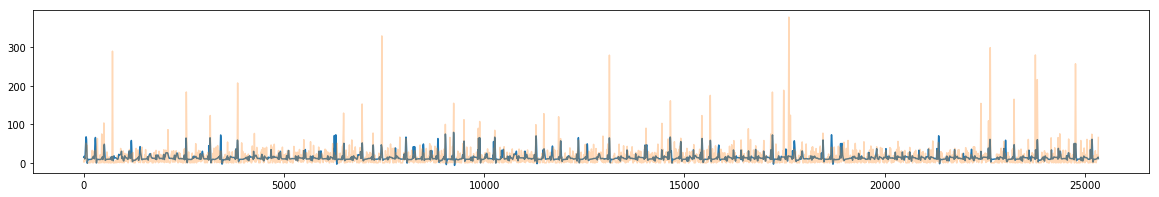

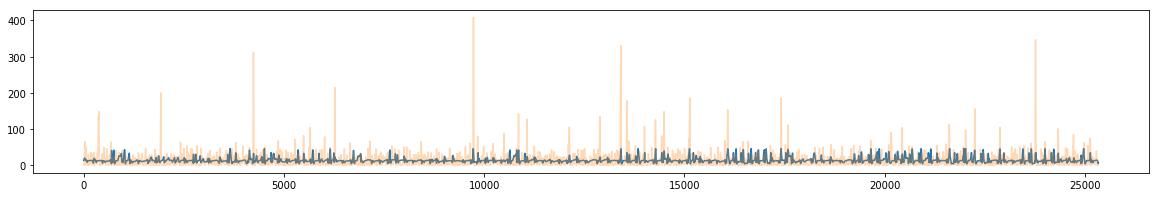

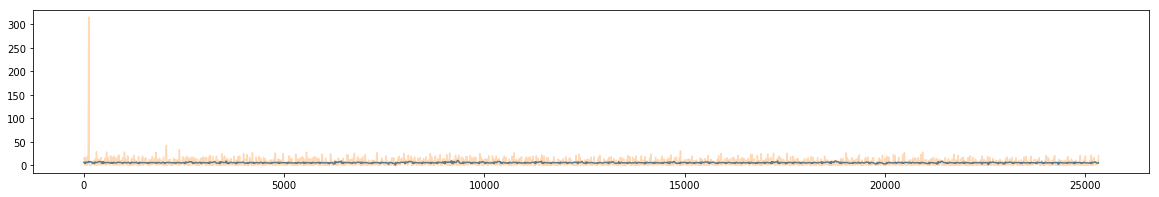

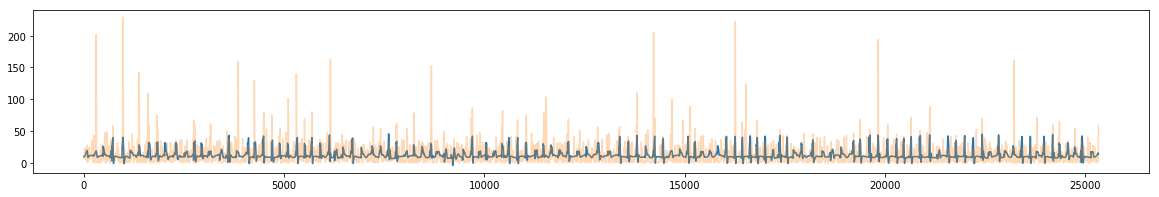

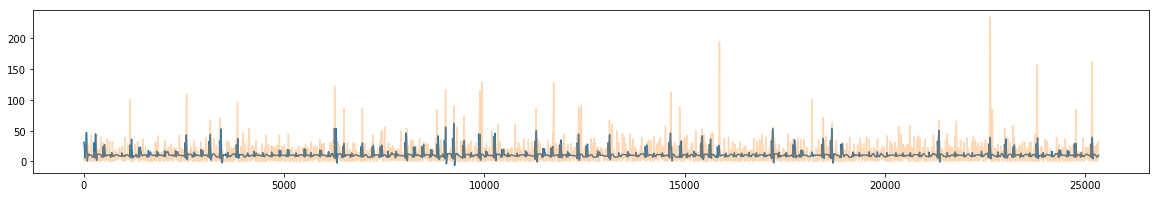

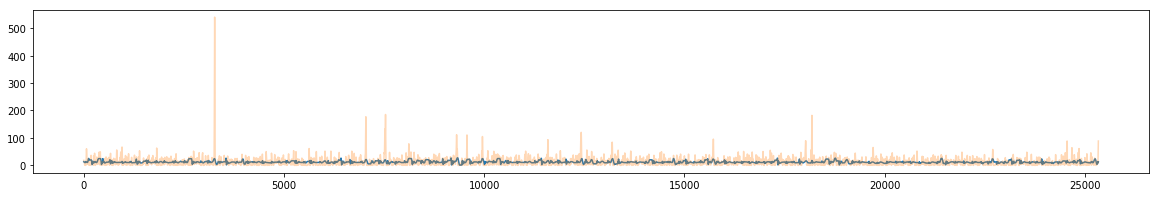

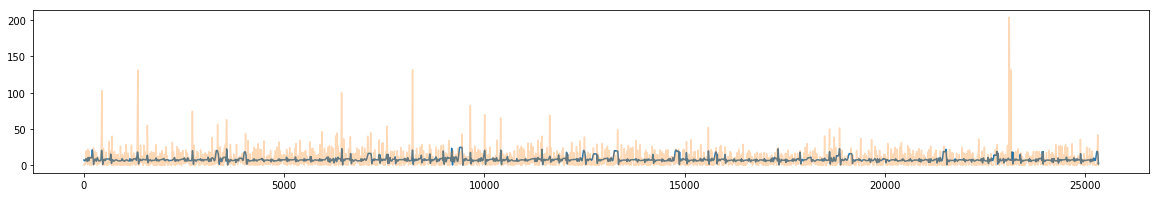

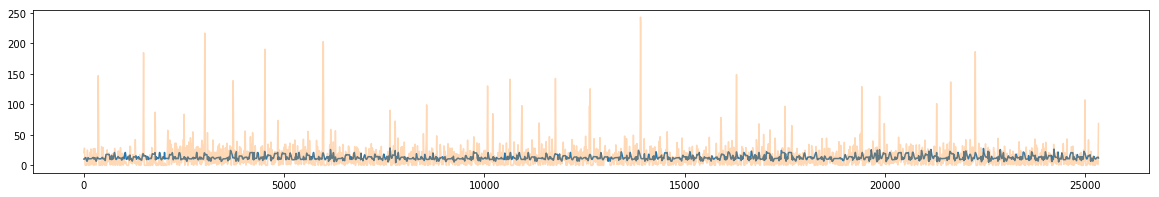

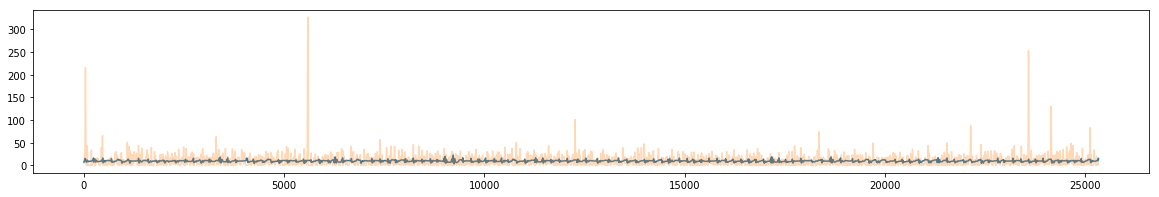

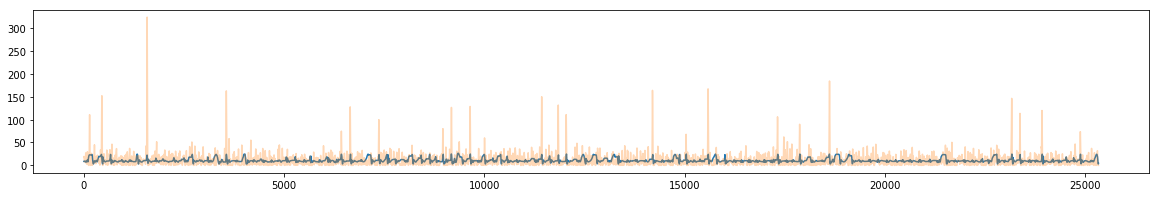

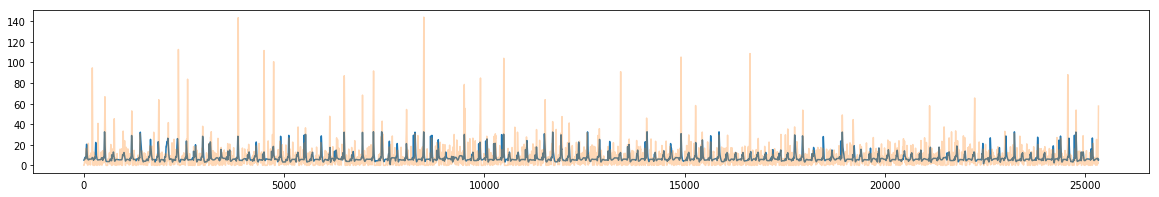

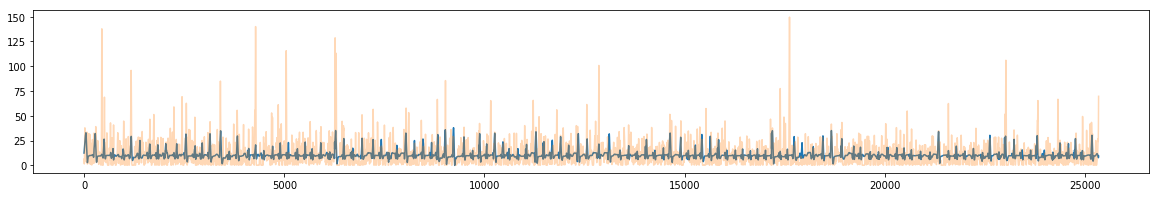

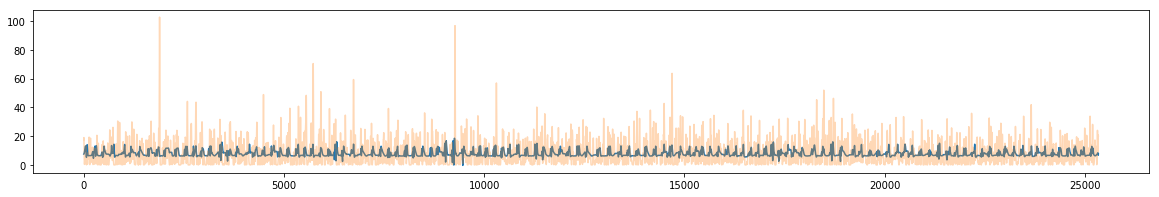

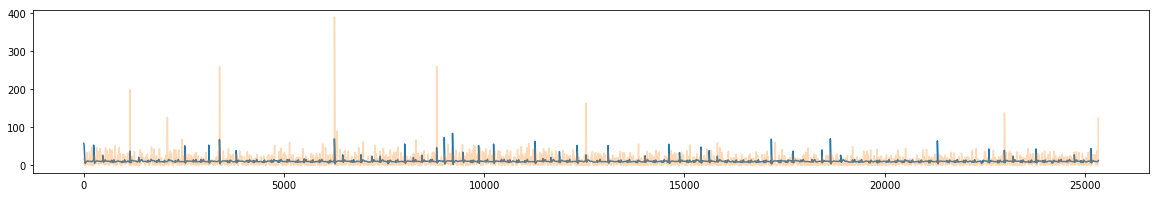

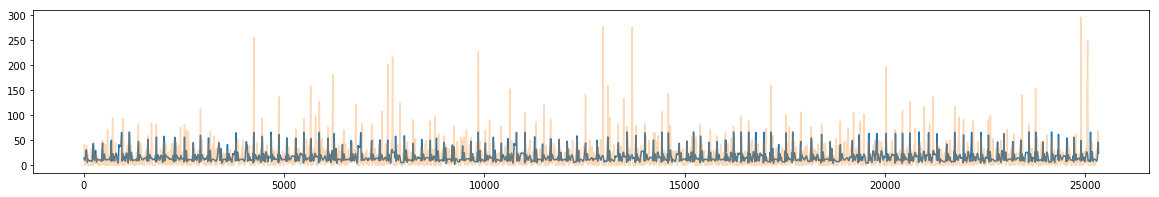

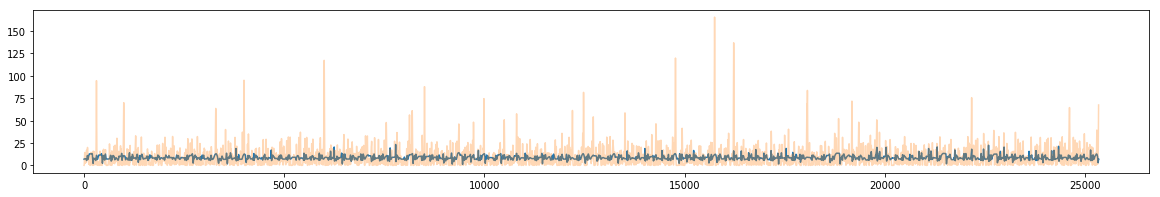

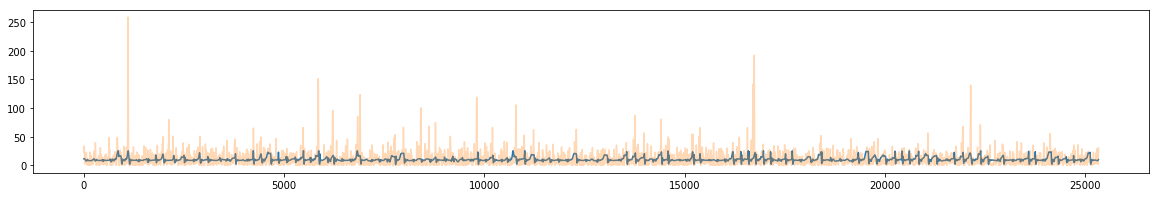

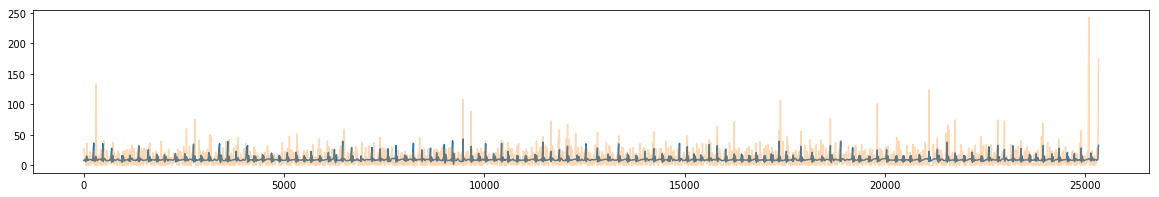

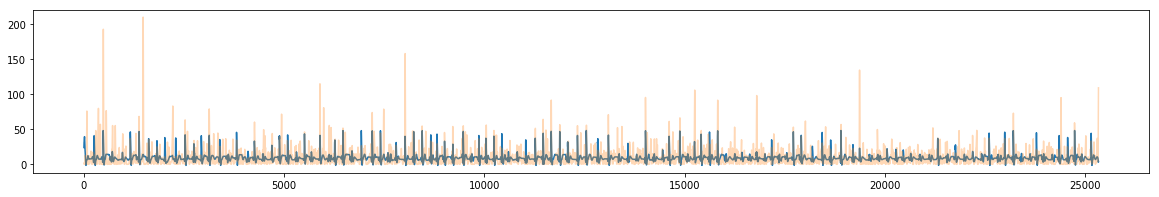

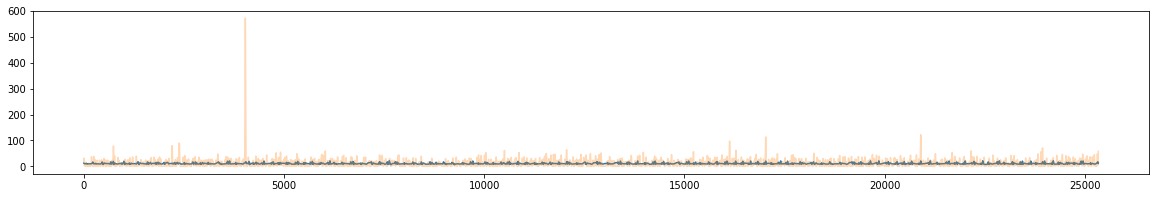

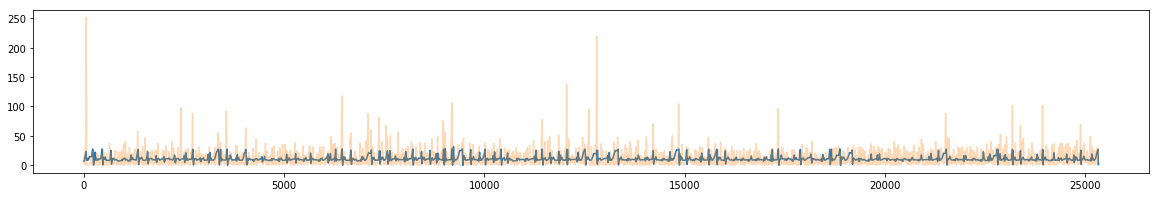

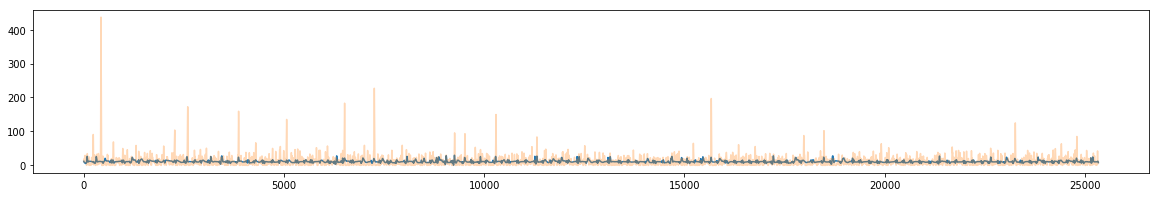

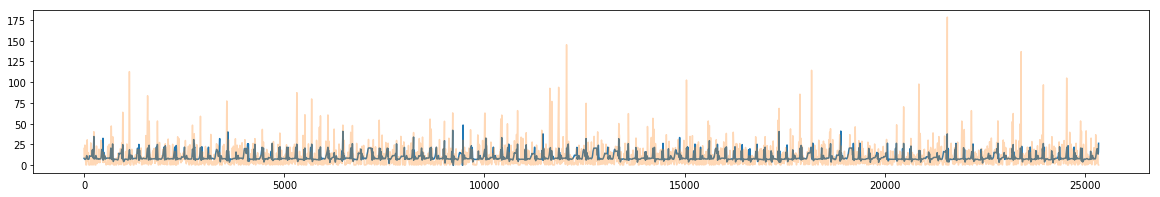

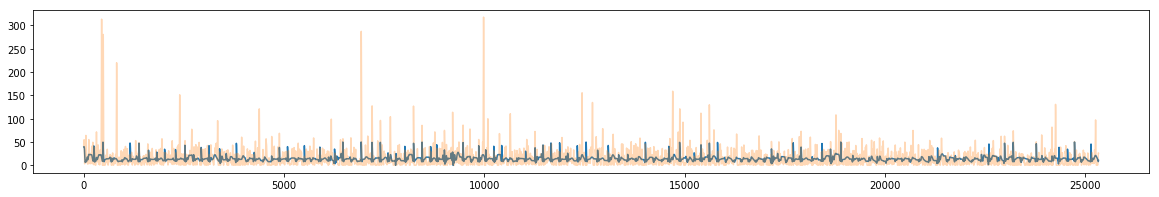

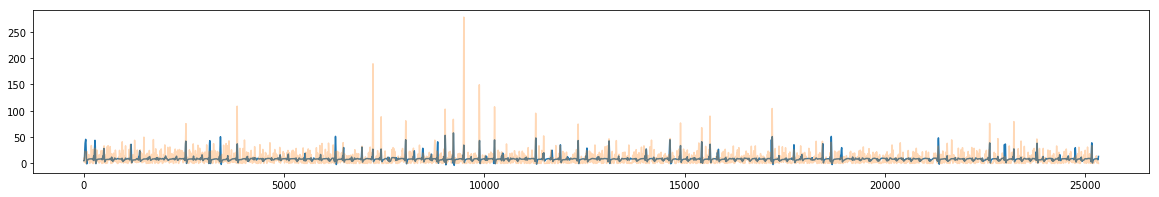

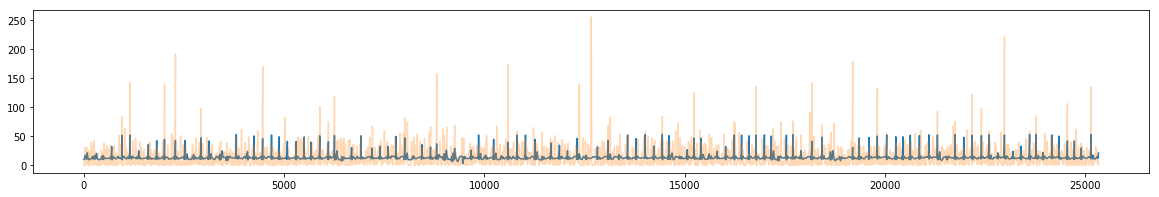

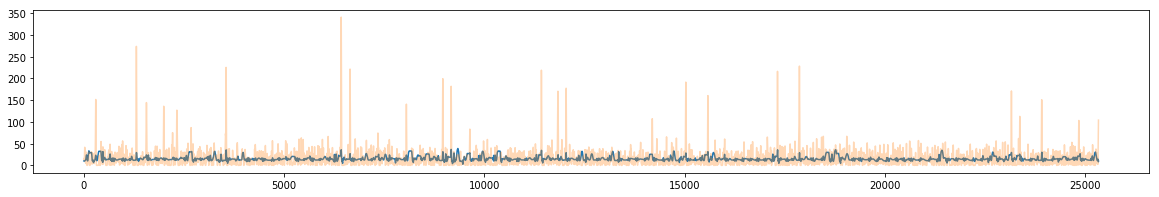

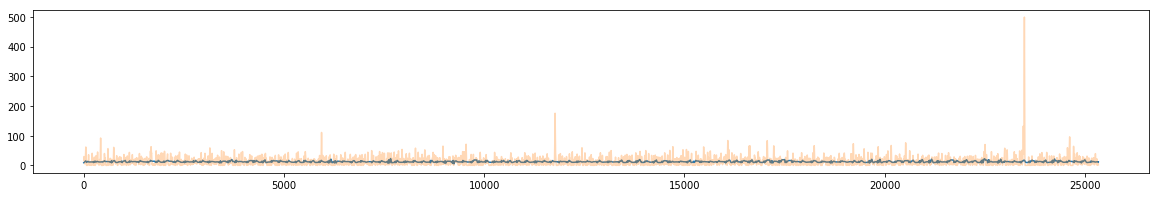

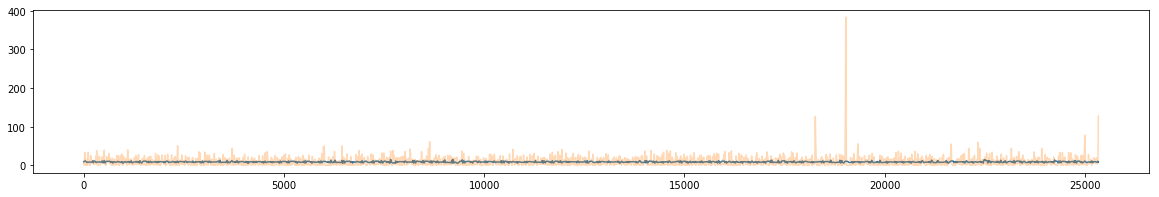

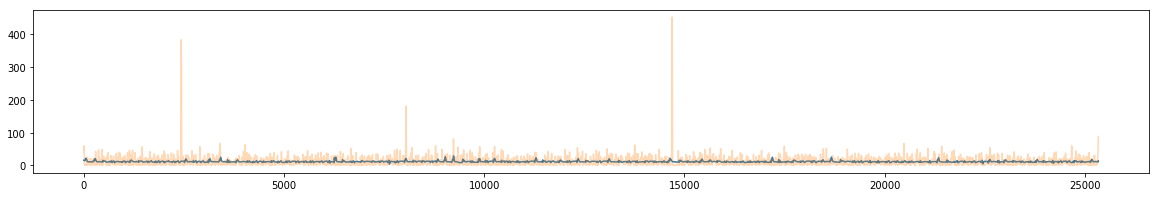

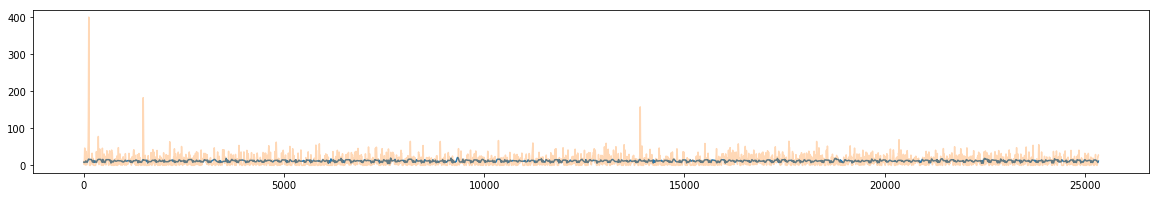

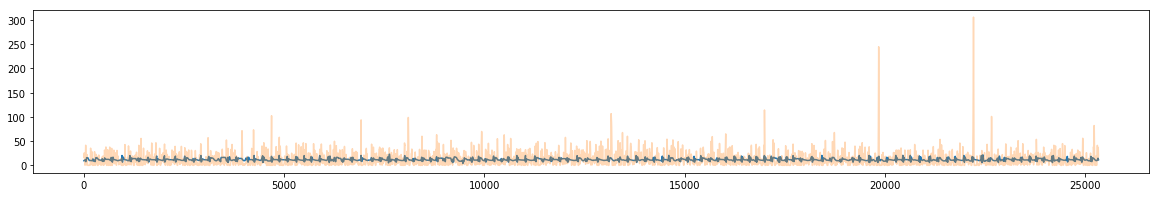

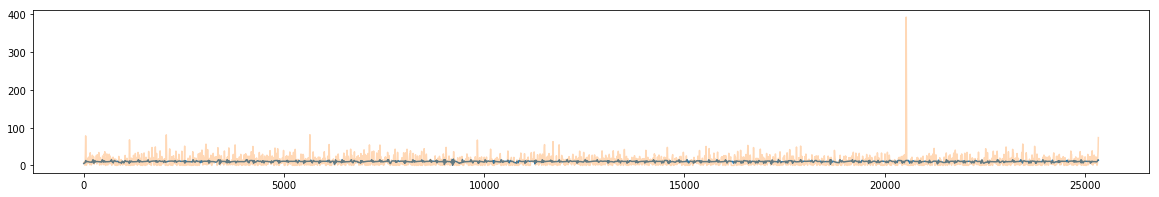

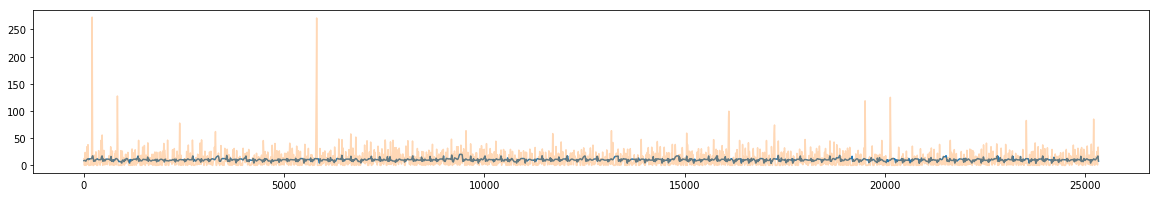

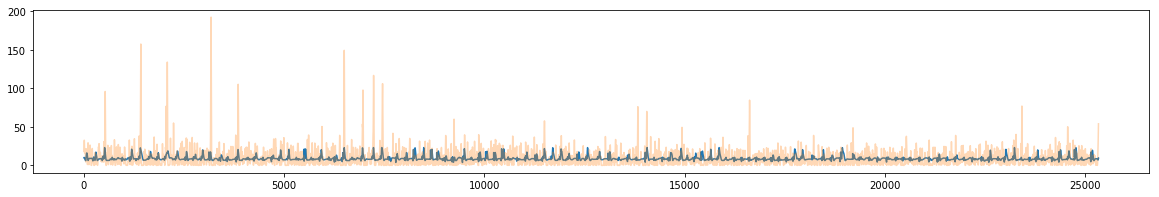

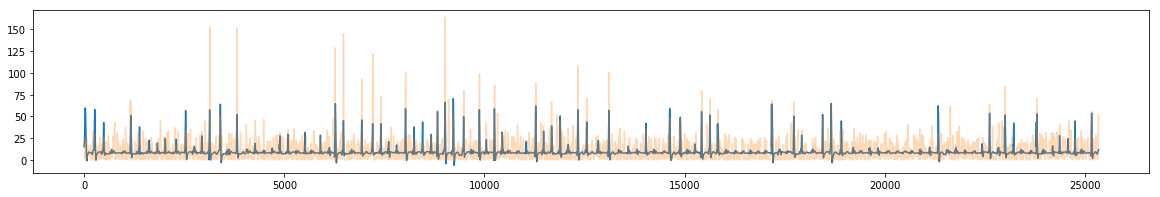

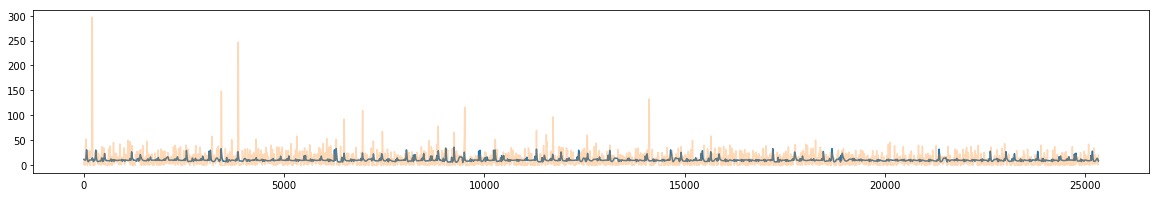

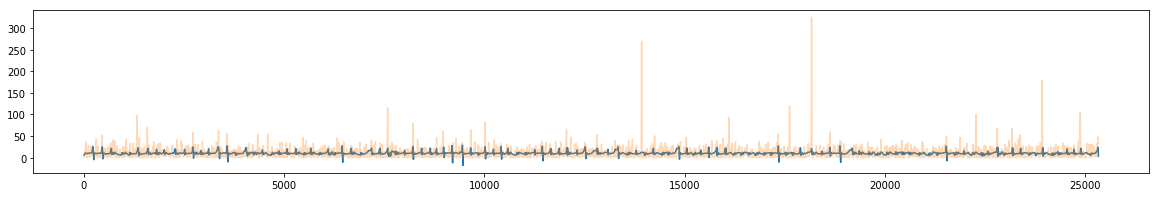

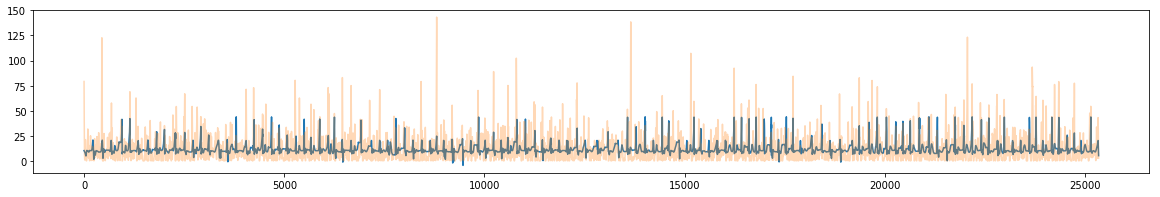

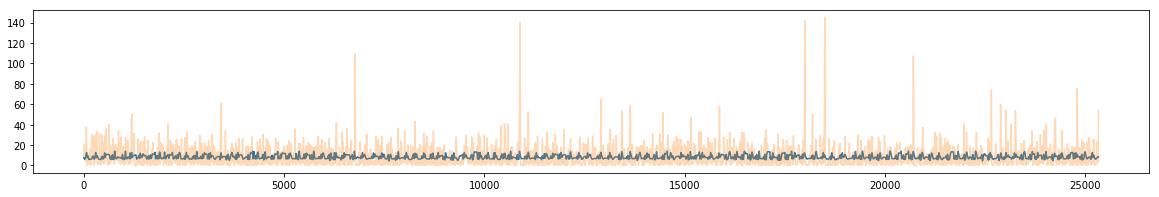

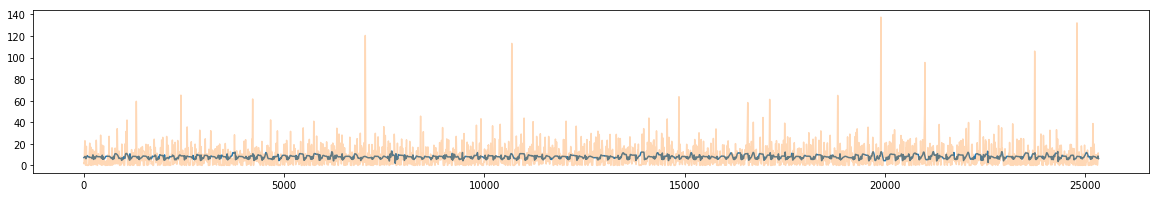

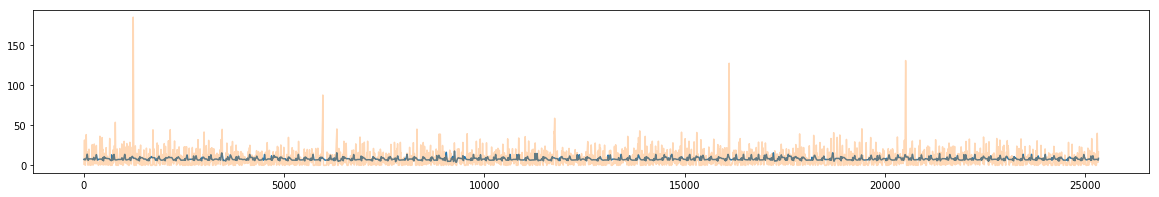

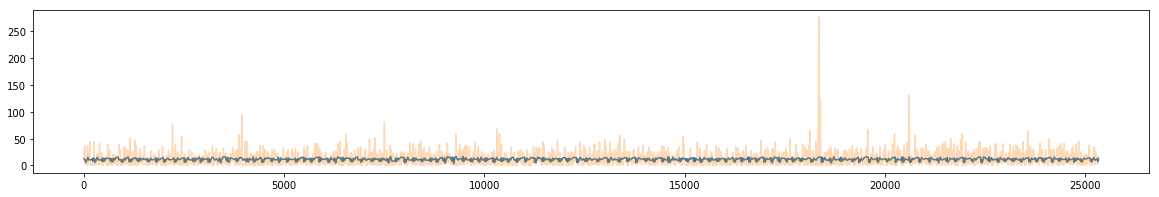

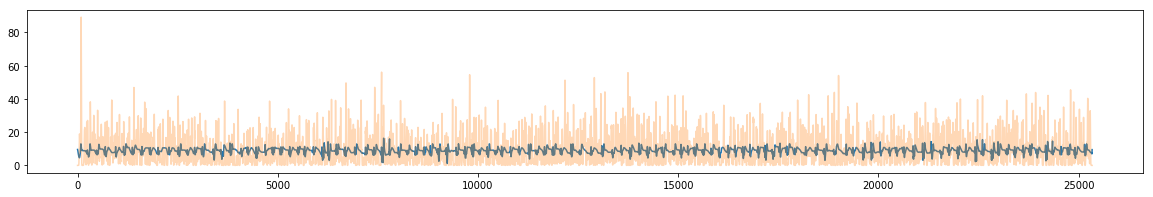

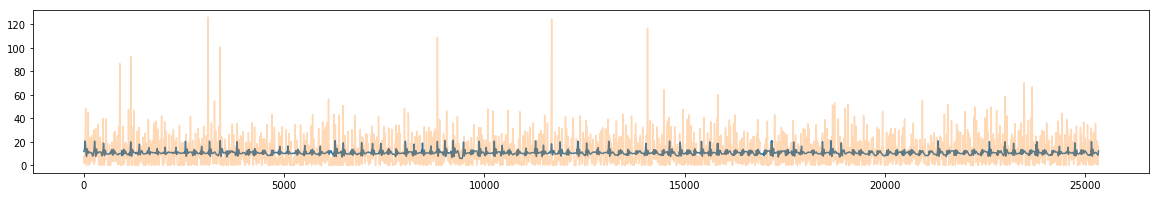

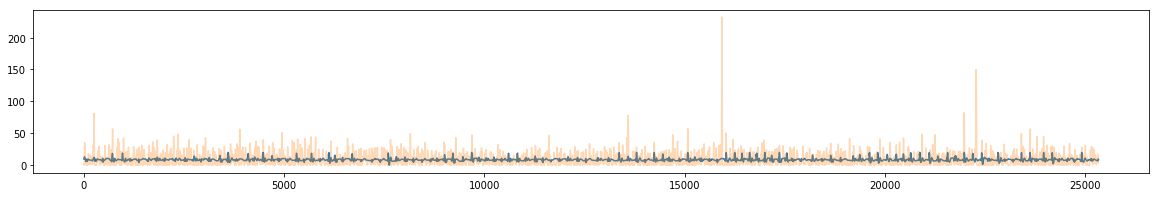

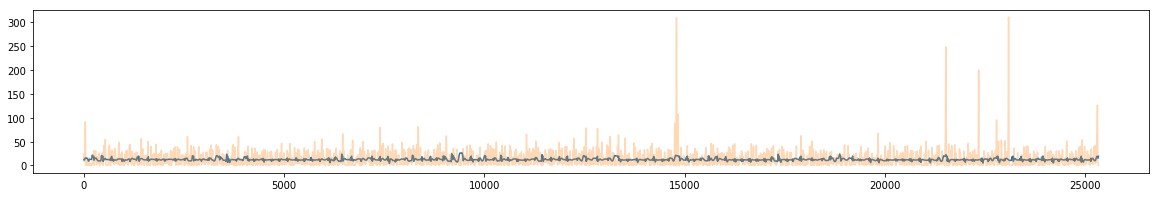

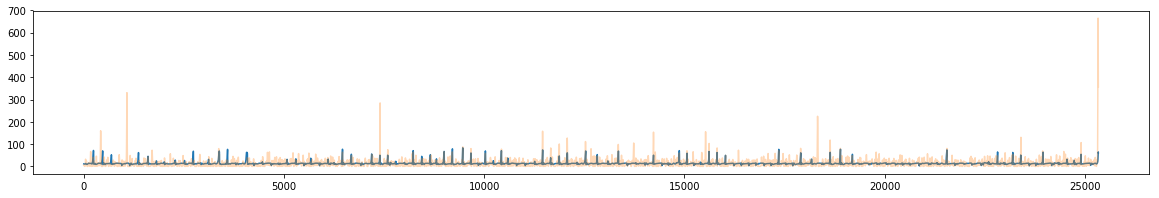

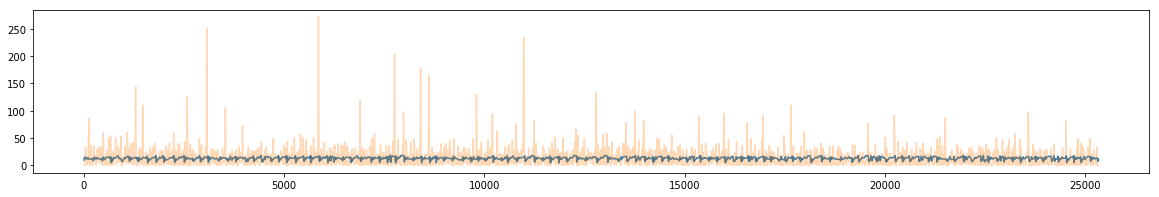

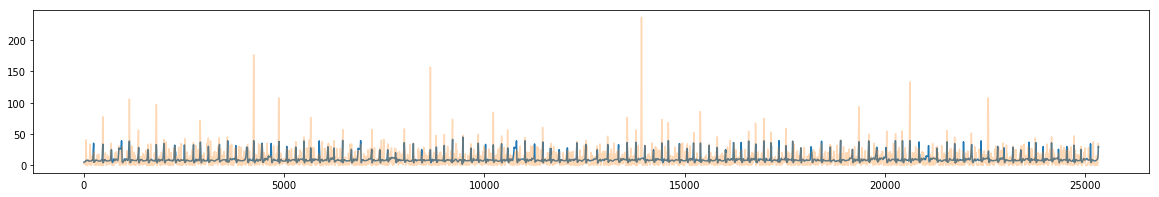

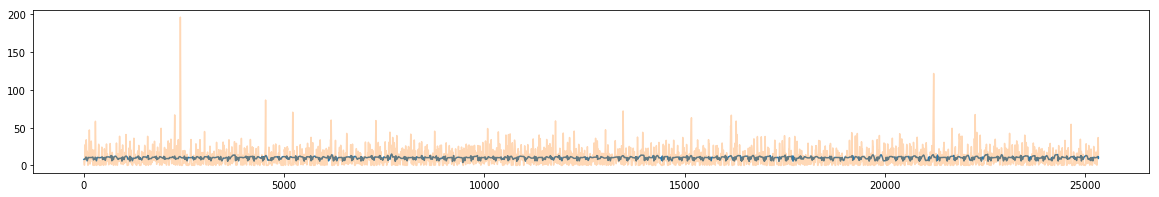

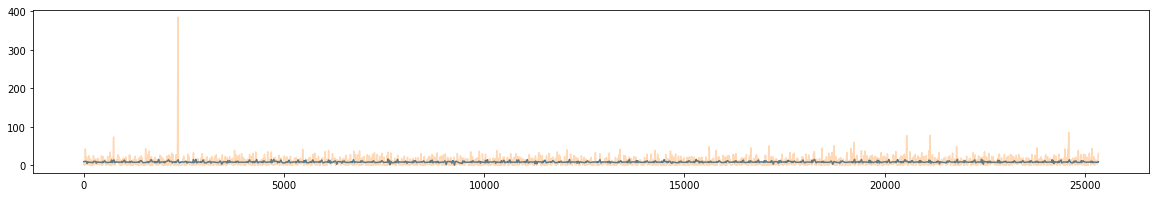

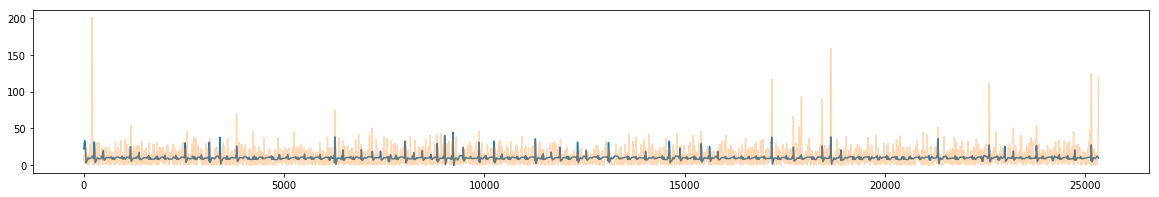

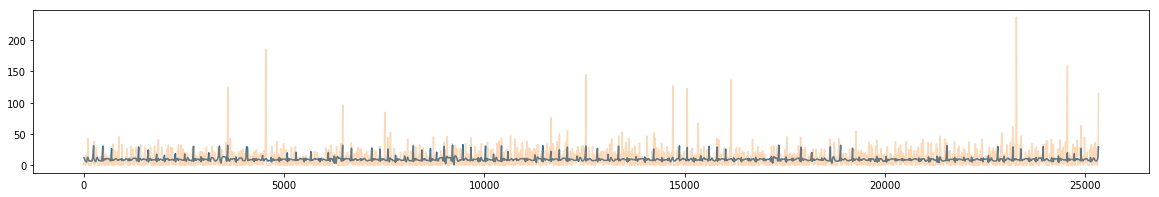

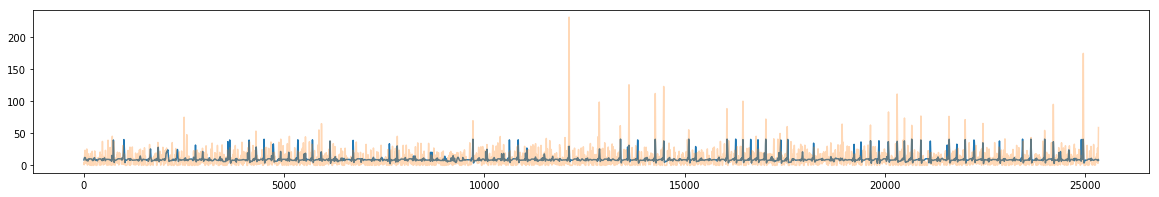

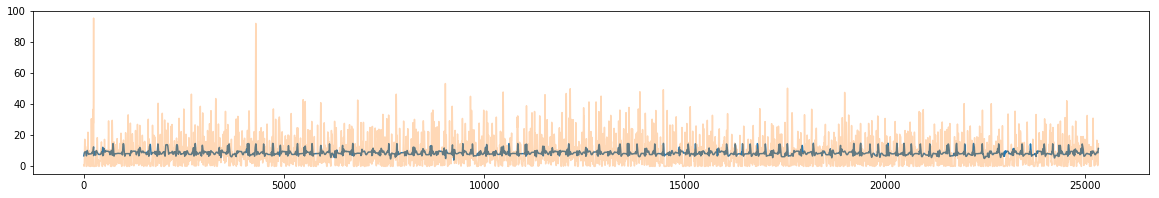

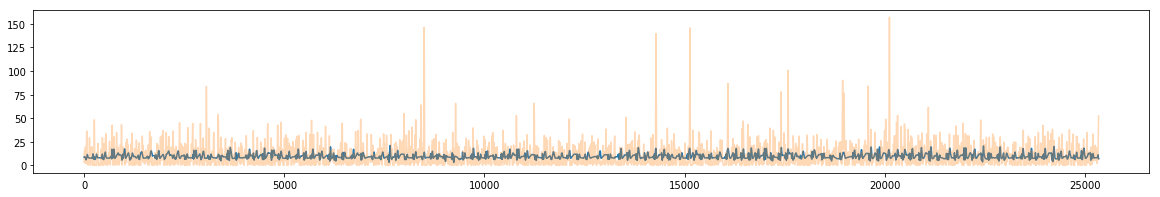

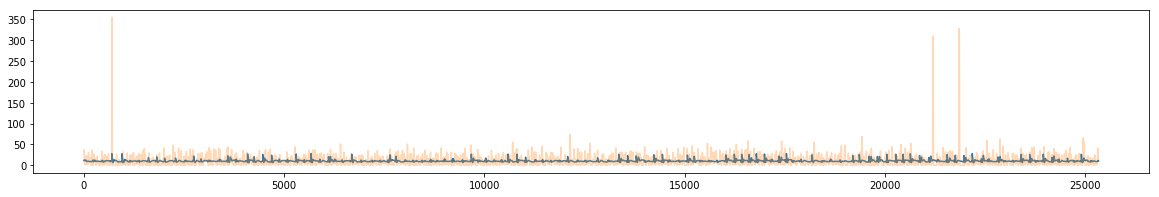

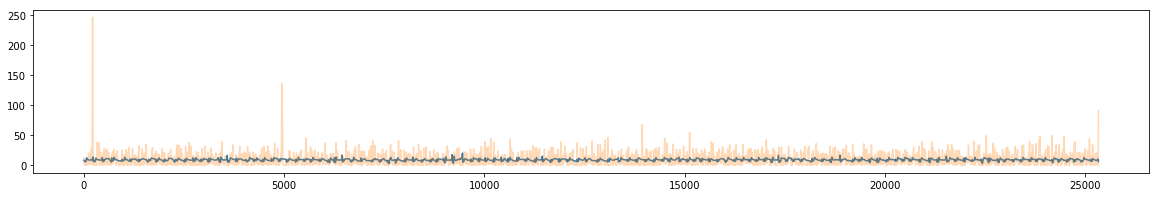

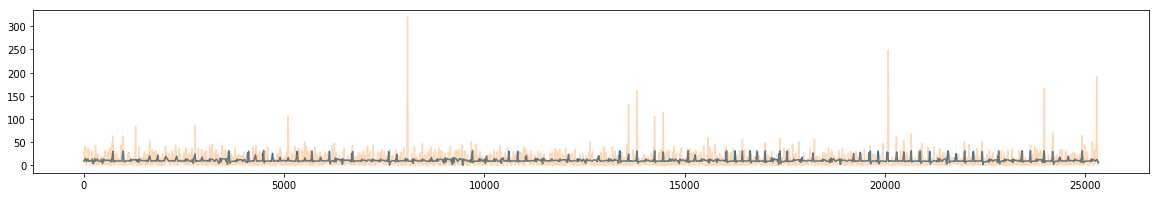

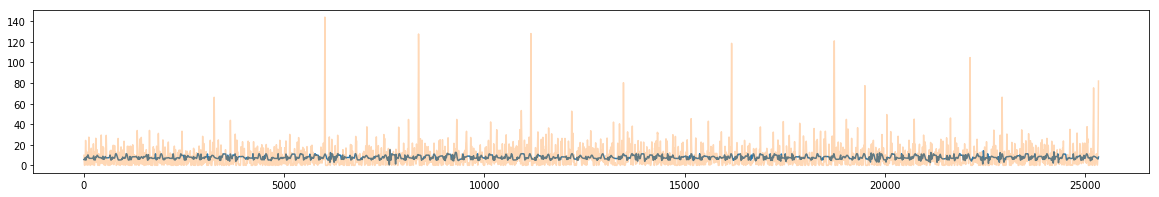

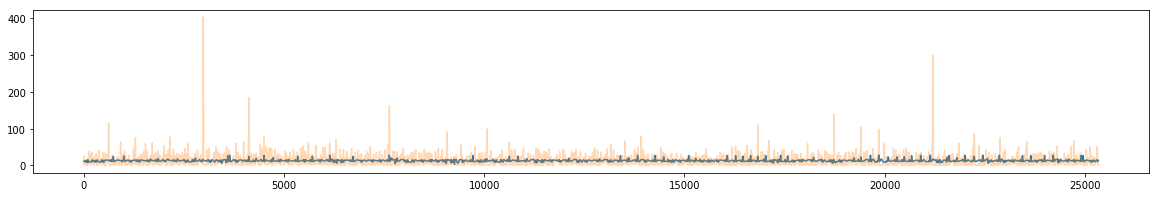

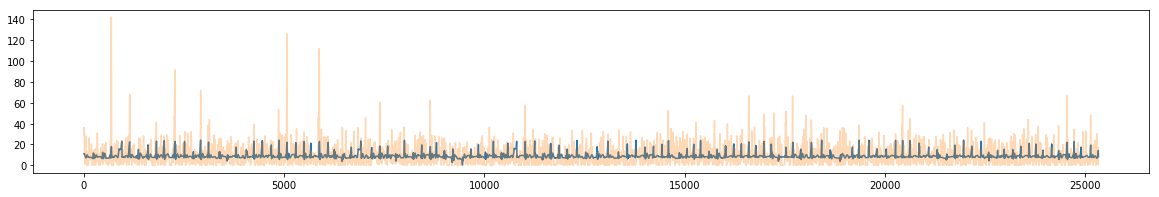

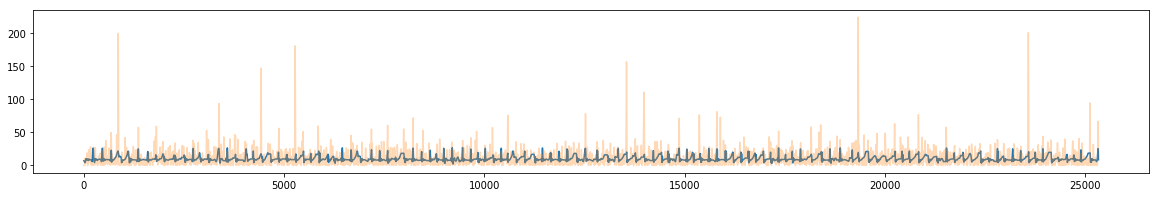

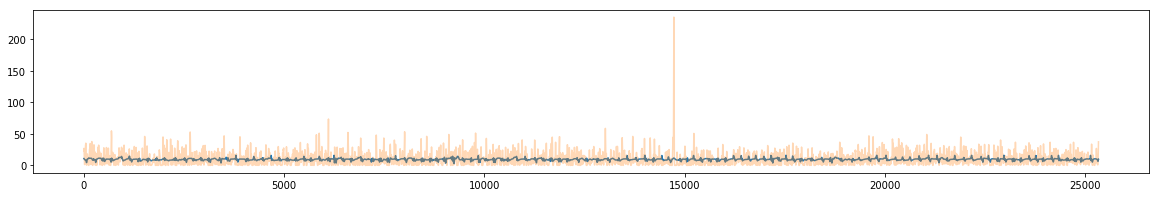

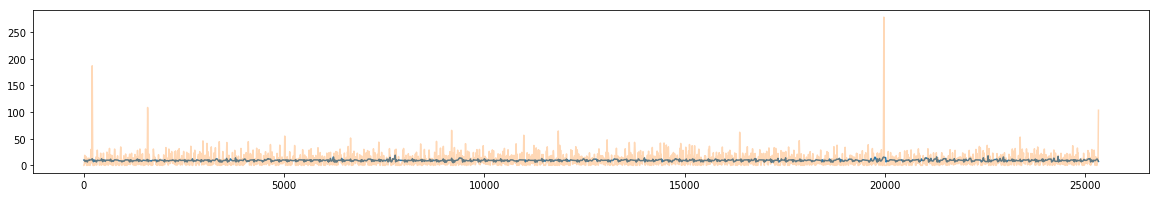

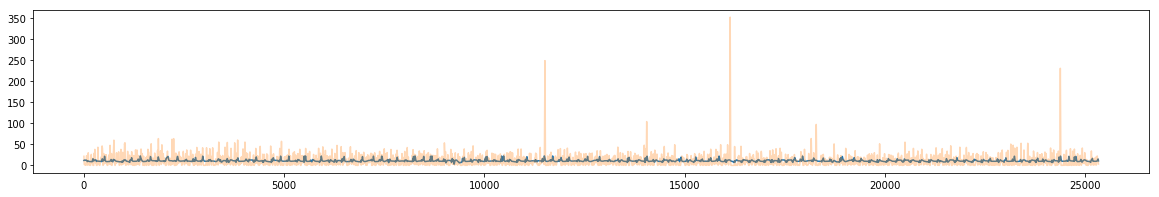

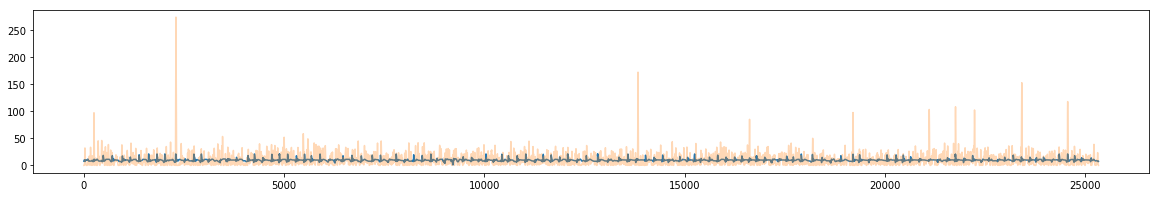

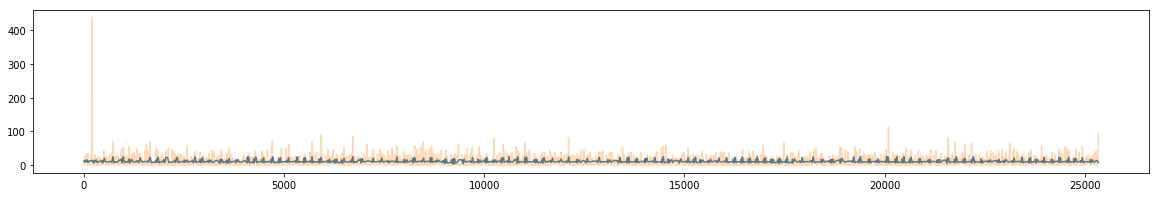

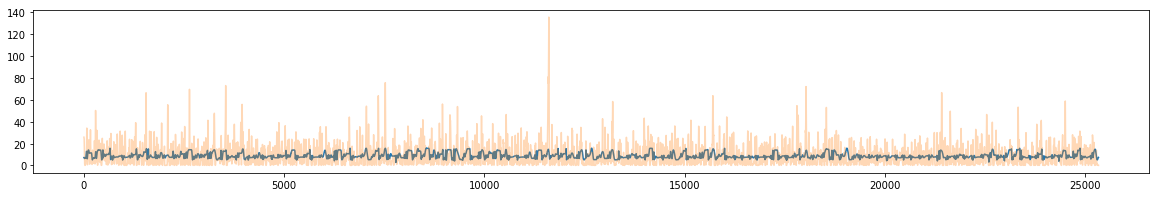

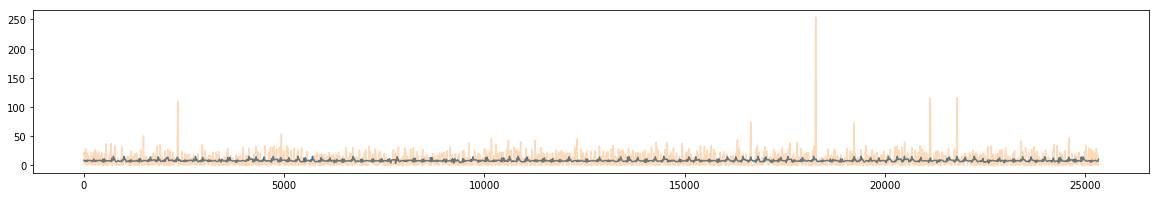

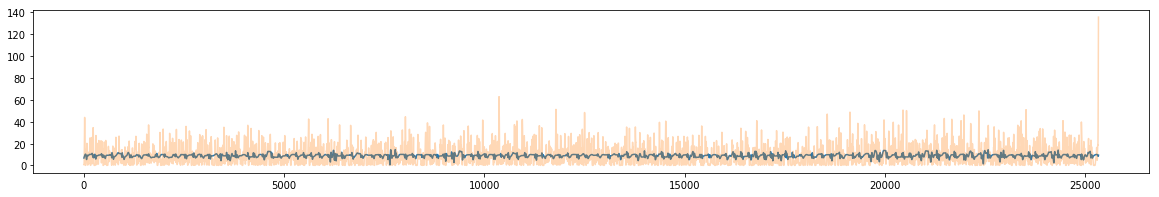

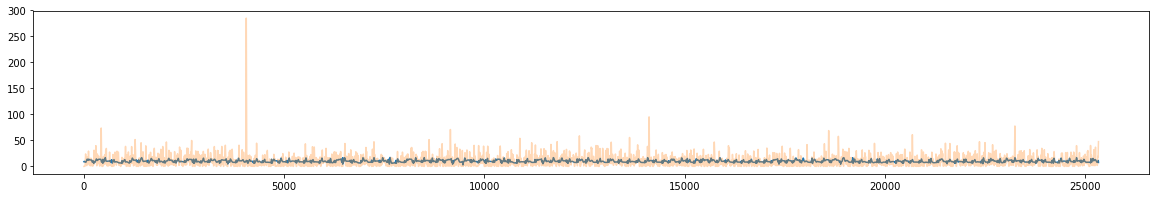

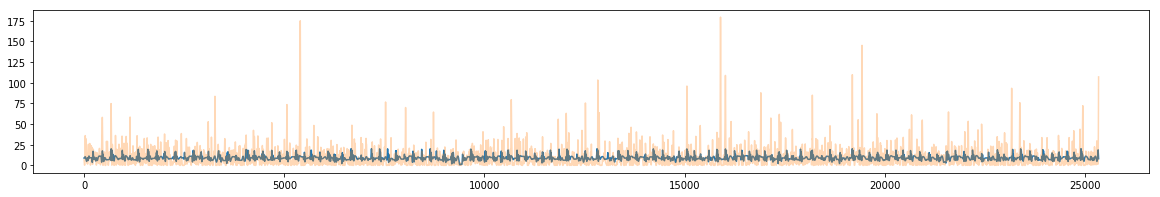

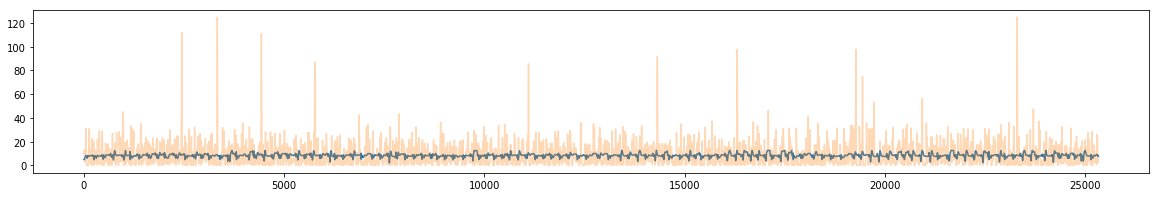

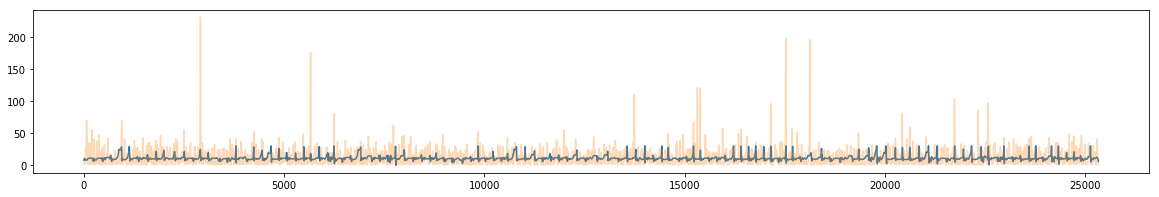

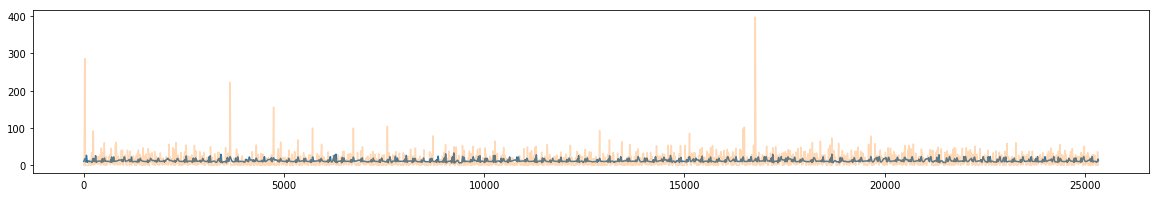

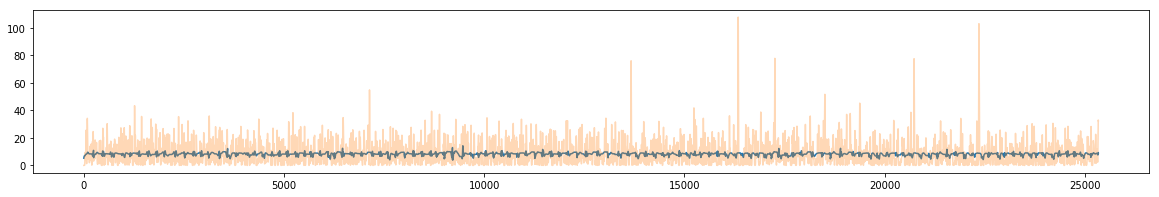

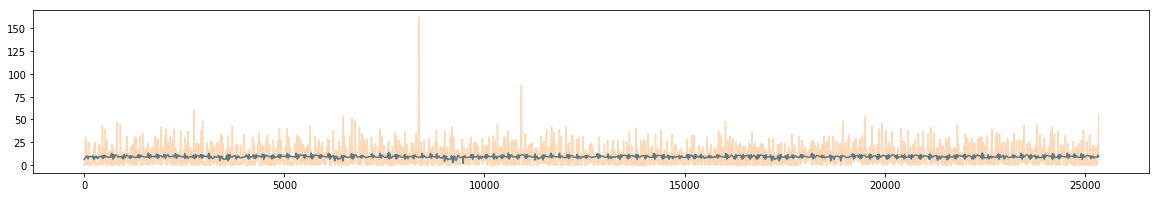

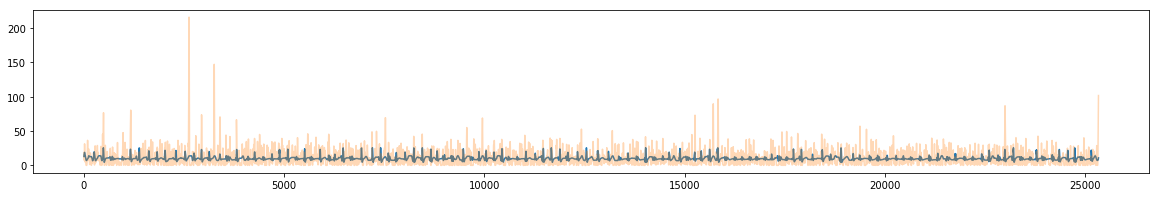

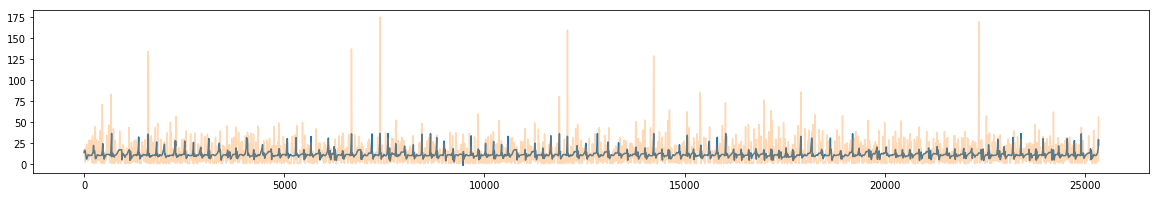

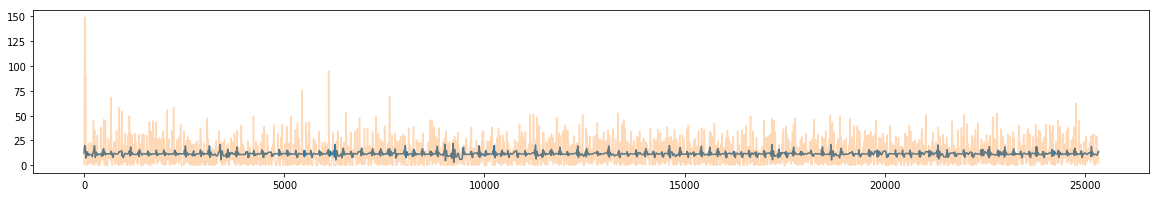

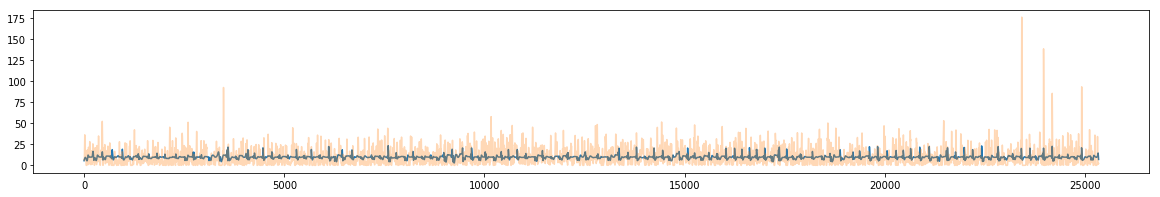

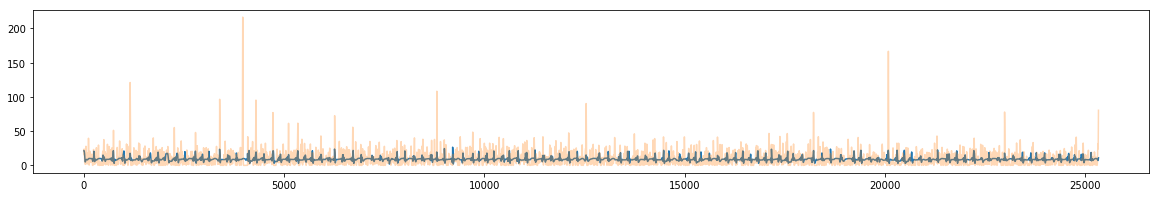

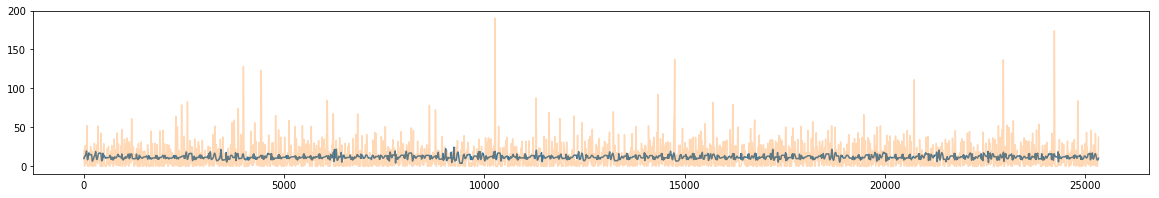

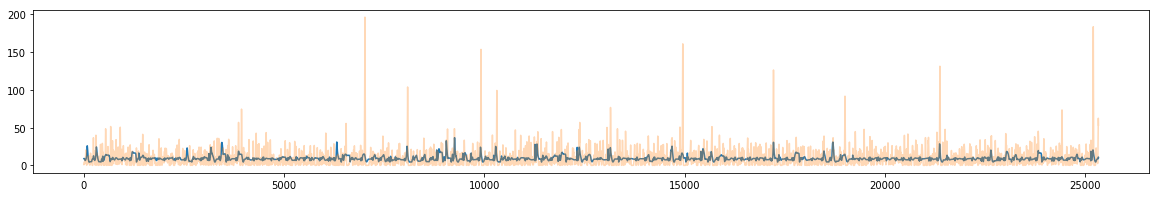

In [75]:
x = np.arange(Y.shape[0])
for cell in range(0,Y.shape[1],10):
    f,ax = plt.subplots(figsize=[20,3])
    ax.plot(x,Y[:,cell],alpha=1)
    ax.plot(Ssm[posmask,cell],alpha=.3)